In [1]:

!pip install scipy==1.11.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import seaborn as sns


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
class CleanData():
    """ 'avg_decoded(ms)', 'avg_rgb(ms)', 'avg_filtered(ms)', 'avg_rendered(ms)', 'avg_total_time_to_display(ms)',
                'total_slow_frames', 'total_callbacks', 'correct_play_time(sec)', 'actual_fps', 'total_video_frames',
                'default_fps', 'max_frame_time(ms)', 'correct_play_time(sec)'

                'decode(ms)','convert_rgb(ms)','filter(ms)','display(ms)','time_in_callback(ms)','avg_decoded(ms)',
    'avg_rgb(ms)','avg_filtered(ms)','avg_rendered(ms)','avg_total_time_to_display(ms)','total_slow_frames','total_callbacks',
    'real_play_time(sec)','actual_fps','total_video_frames','default_fps','max_frame_time(ms)','correct_play_time(sec)' """
    def __init__(self,name):
        self.name=self.convert_filename(name)
        self.final_stats_names = ['real_play_time(sec)','correct_play_time(sec)', 'actual_fps',
                'default_fps','total_slow_frames']
        self.avg_names = ['avg_decoded(ms)', 'avg_rgb(ms)', 'avg_filtered(ms)', 'avg_rendered(ms)', 'avg_total_time_to_display(ms)']
        self.summary_cols_names = self.avg_names+self.final_stats_names
        del_col_names = self.summary_cols_names +['total_video_frames',
                 'max_frame_time(ms)', 'correct_play_time(sec)','total_callbacks']
        self.df_summary=pd.DataFrame(columns=self.summary_cols_names)
        self.og_df = pd.read_csv(name, index_col=False)
        self.df = copy.copy(self.og_df)
        self.make_summary()
        self.df = self.df.drop(del_col_names, axis=1)


    def make_summary(self):
        cols_to_avg = ['decode(ms)', 'convert_rgb(ms)', 'filter(ms)', 'display(ms)', 'time_in_callback(ms)']

        for i, col_name in enumerate(cols_to_avg):
            avg_value = self.og_df[col_name].mean()
            self.df_summary.loc[0, self.summary_cols_names[i]] = avg_value

        for col_name in self.final_stats_names:
            self.df_summary[col_name] = self.og_df[col_name]

    def convert_filename(self,filename):
        basename = os.path.basename(filename)
        name_parts = basename.split('_')

        name_parts[0] = name_parts[0].replace('l_', 'linux_')
        name_parts[-1] = name_parts[-1].replace('.csv','')

        new_filename = '_'.join(name_parts)

        return new_filename




In [3]:
FILE_EXT = 'filterdNew/'

In [4]:
files = [f for f in os.listdir(FILE_EXT) if f.endswith(".csv")]
print(files)

['l_greyscale_O1.csv', 'bm_fisheye_O2_allCache.csv', 'l_sobel_O3.csv', 'l_greyscale_O3.csv', 'bm_fisheye_O1_allCache.csv', 'l_greyscale_O2.csv', 'bm_greyscale_O1_allCache.csv', 'l_fisheye_O1.csv', 'bm_sobelFSqrt_O3_allCache.csv', 'l_fisheye_O2.csv', 'l_greyscale_O0.csv', 'bm_greyscale_O3_allCache.csv', 'l_sobel_O0.csv', 'bm_greyscale_O3_cached.csv', 'bm_sobel_O3_cached.csv', 'bm_sobel_O1_allCache.csv', 'bm_fisheye_O3_cached.csv', 'l_fisheye_O0.csv', 'l_fisheye_O3.csv', 'l_sobel_O2.csv', 'l_sobel_O1.csv', 'bm_fisheye_O3_allCache.csv', 'bm_sobel_O3_allCache.csv', 'bm_sobel_O3_nocache.csv', 'bm_fisheyeFSqrt_O3_allCache.csv', 'bm_greyscale_O3_nocache.csv', 'bm_greyscale_O2_allCache.csv', 'bm_sobel_O2_allCache.csv']


In [5]:
dfs = []
for file in files:
    dfs.append(CleanData(FILE_EXT+file))
dfs.sort(key=lambda x: x.name)
for d in dfs:
    print(d.name)

bm_fisheyeFSqrt_O3_allCache
bm_fisheye_O1_allCache
bm_fisheye_O2_allCache
bm_fisheye_O3_allCache
bm_fisheye_O3_cached
bm_greyscale_O1_allCache
bm_greyscale_O2_allCache
bm_greyscale_O3_allCache
bm_greyscale_O3_cached
bm_greyscale_O3_nocache
bm_sobelFSqrt_O3_allCache
bm_sobel_O1_allCache
bm_sobel_O2_allCache
bm_sobel_O3_allCache
bm_sobel_O3_cached
bm_sobel_O3_nocache
l_fisheye_O0
l_fisheye_O1
l_fisheye_O2
l_fisheye_O3
l_greyscale_O0
l_greyscale_O1
l_greyscale_O2
l_greyscale_O3
l_sobel_O0
l_sobel_O1
l_sobel_O2
l_sobel_O3


In [6]:
avg_df = pd.DataFrame()
i=0
for df in dfs:

    df.df_summary['file'] = df.name
    df.og_df['file'] = df.name
    df.df['file'] = df.name
    avg_df = pd.concat([avg_df,df.df_summary[['file']+df.avg_names]], axis=0, ignore_index=True)

avg_df.head(5)

file avg_decoded(ms) avg_rgb(ms) avg_filtered(ms)  \
0  bm_fisheyeFSqrt_O3_allCache       27.594406     7.38729       127.521727   
1       bm_fisheye_O1_allCache      163.807719    8.309585       311.713165   
2       bm_fisheye_O2_allCache       24.651091    7.378861       307.197724   
3       bm_fisheye_O3_allCache       28.656116     7.37256       306.410591   
4         bm_fisheye_O3_cached      162.201287   95.082259       335.427227   

  avg_rendered(ms) avg_total_time_to_display(ms)  
0          1.50071                    164.004134  
1         1.860787                    485.691256  
2          1.99575                    341.223426  
3         1.505239                    343.944506  
4           4.5065                    597.217273

In [7]:
avg_df =avg_df.set_index('file')
avg_df = avg_df.sort_index()

In [8]:
avg_df.head(10)

avg_decoded(ms) avg_rgb(ms) avg_filtered(ms)  \
file                                                                       
bm_fisheyeFSqrt_O3_allCache       27.594406     7.38729       127.521727   
bm_fisheye_O1_allCache           163.807719    8.309585       311.713165   
bm_fisheye_O2_allCache            24.651091    7.378861       307.197724   
bm_fisheye_O3_allCache            28.656116     7.37256       306.410591   
bm_fisheye_O3_cached             162.201287   95.082259       335.427227   
bm_greyscale_O1_allCache         170.011213    8.307094         3.156094   
bm_greyscale_O2_allCache          37.919043    7.391929          3.74023   
bm_greyscale_O3_allCache          33.552006    7.391307         3.140352   
bm_greyscale_O3_cached           161.393784   89.894071        30.488165   
bm_greyscale_O3_nocache          578.684917  230.291261       144.010994   

                            avg_rendered(ms) avg_total_time_to_display(ms)  
file                                                                        
bm_fisheyeFSqrt_O3_allCache          1.50071                    164.004134  
bm_fisheye_O1_allCache              1.860787                    485.691256  
bm_fisheye_O2_allCache               1.99575                    341.223426  
bm_fisheye_O3_allCache              1.505239                    343.944506  
bm_fisheye_O3_cached                  4.5065                    597.217273  
bm_greyscale_O1_allCache            2.522932                    183.997332  
bm_greyscale_O2_allCache            2.577017                     51.628219  
bm_greyscale_O3_allCache             1.54629                     45.629955  
bm_greyscale_O3_cached              4.634688                    286.410707  
bm_greyscale_O3_nocache             8.246708                    961.233881

In [9]:
colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown']
df_l = avg_df[avg_df.index.str.startswith('l')]
df_bm = avg_df[avg_df.index.str.startswith('bm')]
df_l.head(5)

avg_decoded(ms) avg_rgb(ms) avg_filtered(ms) avg_rendered(ms)  \
file                                                                           
l_fisheye_O0         52.561086   26.747816       125.371253         4.821166   
l_fisheye_O1         18.392754      8.0765        67.322619         2.798838   
l_fisheye_O2         16.034177    6.818393        63.910106          2.67697   
l_fisheye_O3         13.314462    6.856864        63.831782         2.812087   
l_greyscale_O0       52.532619   26.528453        15.556988         2.947813   

               avg_total_time_to_display(ms)  
file                                          
l_fisheye_O0                      209.501327  
l_fisheye_O1                       96.590707  
l_fisheye_O2                       89.439647  
l_fisheye_O3                       86.815194  
l_greyscale_O0                      97.56588

#linux versions overview:
 - the gap between o0 and o1 is by far the most significant
 - the sobel filter benifits the most from optimization
 - sobel and fisheye never reaches the goal framerate

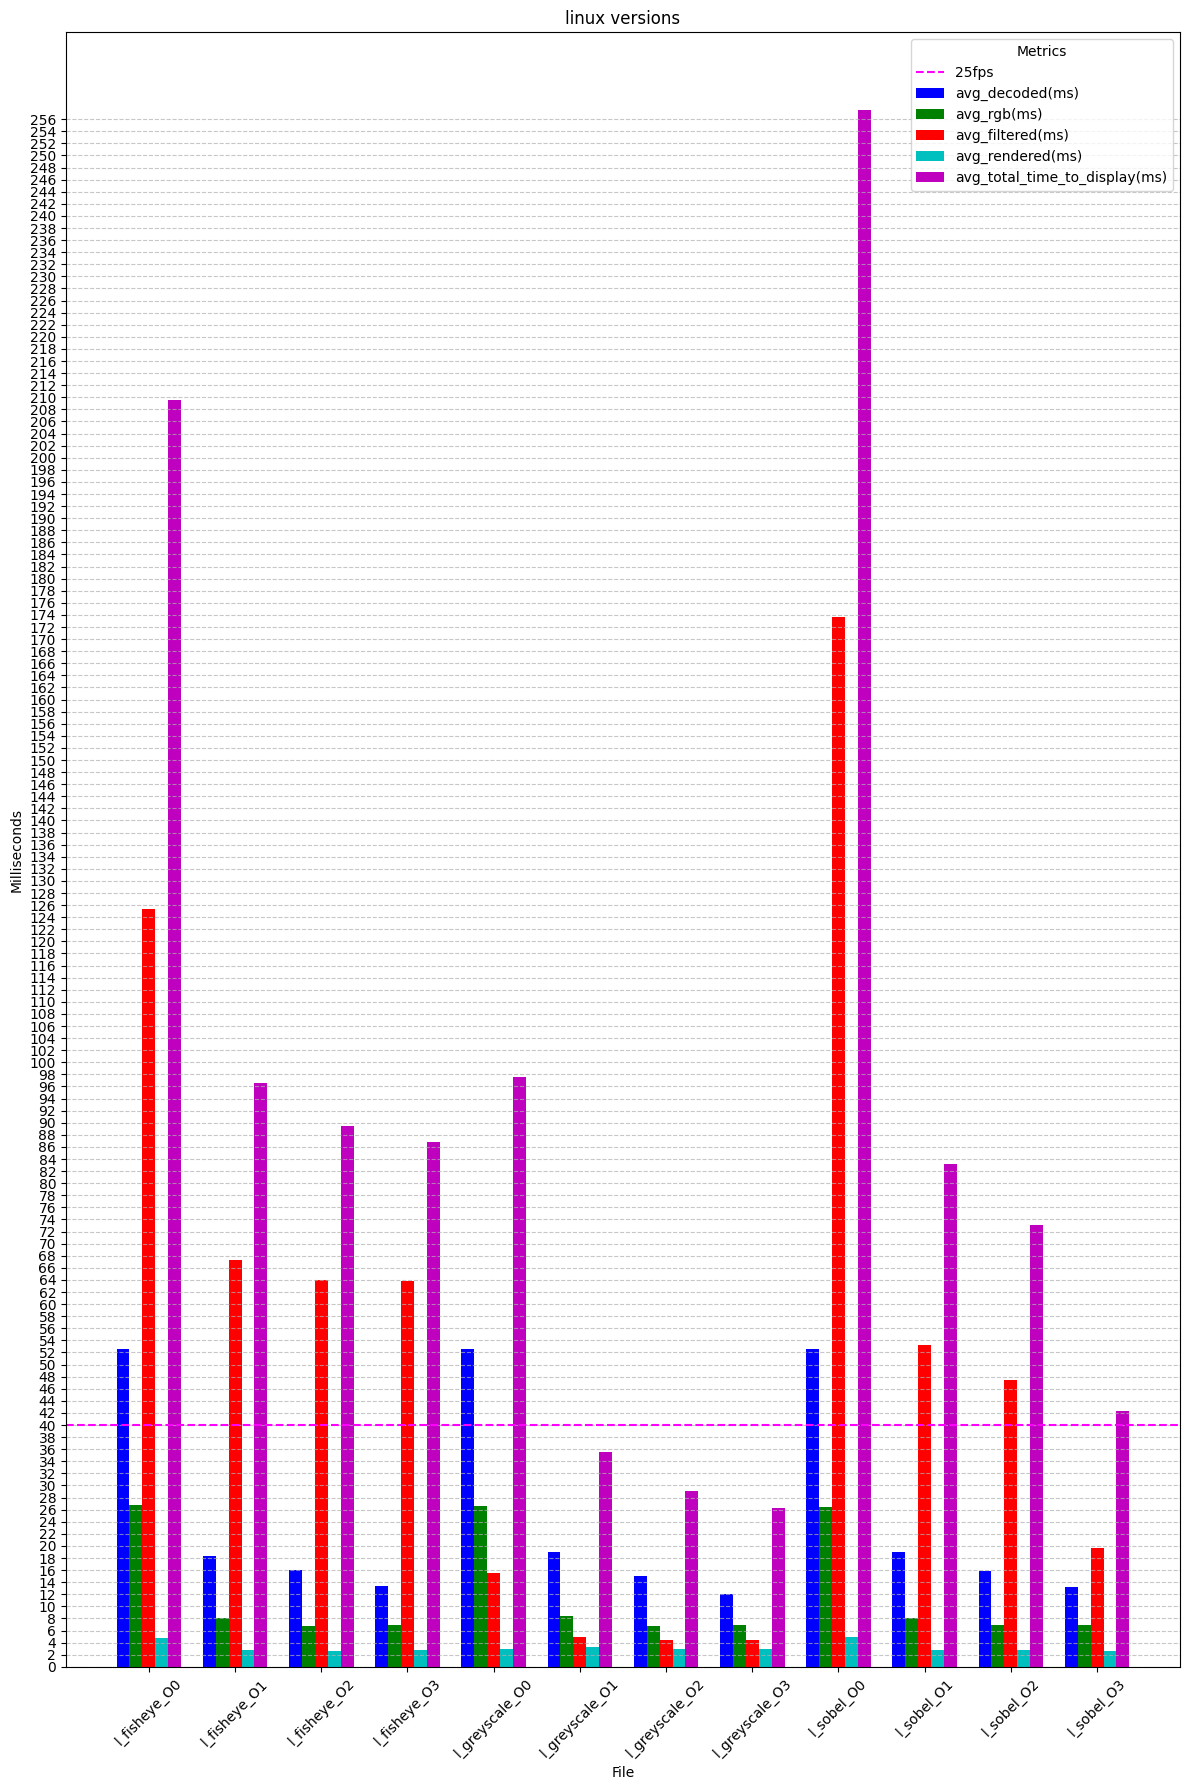

In [10]:
bar_width = 0.15
x = np.arange(len(df_l.index))
plt.figure(figsize=(12,18))
for i, col in enumerate(df_l.columns):
    plt.bar(x + i * bar_width, df_l[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(df_l.columns) - 1) * bar_width / 2, df_l.index, rotation=45)
plt.yticks(np.arange(0, df_l.max().max(), step=2))
plt.title('linux versions')
plt.xlabel('File')
plt.ylabel('Milliseconds')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.legend(title="Metrics")
plt.tight_layout()

plt.show()


In [11]:
df_bm.head(4)

avg_decoded(ms) avg_rgb(ms) avg_filtered(ms)  \
file                                                                       
bm_fisheyeFSqrt_O3_allCache       27.594406     7.38729       127.521727   
bm_fisheye_O1_allCache           163.807719    8.309585       311.713165   
bm_fisheye_O2_allCache            24.651091    7.378861       307.197724   
bm_fisheye_O3_allCache            28.656116     7.37256       306.410591   

                            avg_rendered(ms) avg_total_time_to_display(ms)  
file                                                                        
bm_fisheyeFSqrt_O3_allCache          1.50071                    164.004134  
bm_fisheye_O1_allCache              1.860787                    485.691256  
bm_fisheye_O2_allCache               1.99575                    341.223426  
bm_fisheye_O3_allCache              1.505239                    343.944506

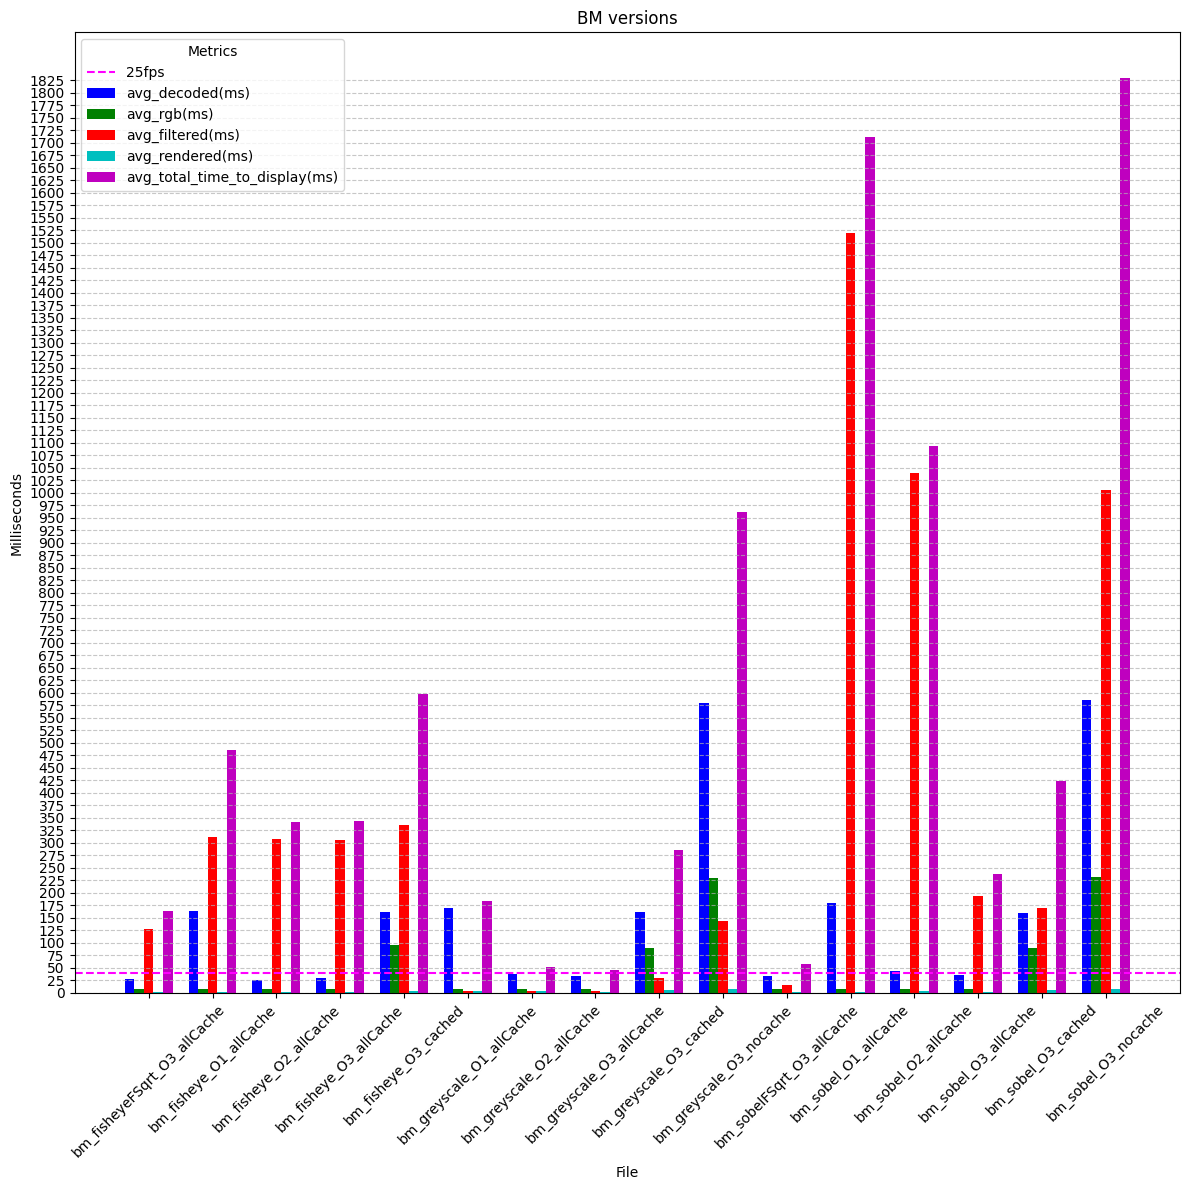

In [12]:
x = np.arange(len(df_bm.index))
plt.figure(figsize=(12, 12))
for i, col in enumerate(df_bm.columns):
    plt.bar(x + i * bar_width, df_bm[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(df_bm.columns) - 1) * bar_width / 2, df_bm.index, rotation=45)
plt.yticks(np.arange(0, df_bm.max().max(), step=25))
plt.title('BM versions')
plt.xlabel('File')
plt.ylabel('Milliseconds')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.legend(title="Metrics")
plt.tight_layout()

plt.show()

In [13]:
print("sobel caching improvement from nocache")
print(f"decode speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_decoded(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_cached']['avg_decoded(ms)'].iloc[0]))}x")
print(f"rgb conversion speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_rgb(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_cached']['avg_rgb(ms)'].iloc[0]))}x")
print(f"filter speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_filtered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_cached']['avg_filtered(ms)'].iloc[0]))}x")
print(f"render speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_rendered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_cached']['avg_rendered(ms)'].iloc[0]))}x")
print(f"overall speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_total_time_to_display(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_cached']['avg_total_time_to_display(ms)'].iloc[0]))}x\n")

print("greysacale caching improvement from nocache")
print(f"decode speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_decoded(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_cached']['avg_decoded(ms)'].iloc[0]))}x")
print(f"rgb conversion speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_rgb(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_cached']['avg_rgb(ms)'].iloc[0]))}x")
print(f"filter speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_filtered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_cached']['avg_filtered(ms)'].iloc[0]))}x")
print(f"render speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_rendered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_cached']['avg_rendered(ms)'].iloc[0]))}x")
print(f"overall speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_total_time_to_display(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_cached']['avg_total_time_to_display(ms)'].iloc[0]))}x\n")

print("sobel allocating caching improvement from nocache")
print(f"decode speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_decoded(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_allCache']['avg_decoded(ms)'].iloc[0]))}x")
print(f"rgb conversion speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_rgb(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_allCache']['avg_rgb(ms)'].iloc[0]))}x")
print(f"filter speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_filtered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_allCache']['avg_filtered(ms)'].iloc[0]))}x")
print(f"render speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_rendered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_allCache']['avg_rendered(ms)'].iloc[0]))}x")
print(f"overall speed up with cache: {((df_bm[df_bm.index == 'bm_sobel_O3_nocache']['avg_total_time_to_display(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_sobel_O3_allCache']['avg_total_time_to_display(ms)'].iloc[0]))}x\n")

print("greysacale allocating caching improvement from nocache")
print(f"decode speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_decoded(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_decoded(ms)'].iloc[0]))}x")
print(f"rgb conversion speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_rgb(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_rgb(ms)'].iloc[0]))}x")
print(f"filter speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_filtered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_filtered(ms)'].iloc[0]))}x")
print(f"render speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_rendered(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_rendered(ms)'].iloc[0]))}x")
print(f"overall speed up with cache: {((df_bm[df_bm.index == 'bm_greyscale_O3_nocache']['avg_total_time_to_display(ms)'].iloc[0])/(df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_total_time_to_display(ms)'].iloc[0]))}x\n")


sobel caching improvement from nocache
decode speed up with cache: 3.653729684801363x
rgb conversion speed up with cache: 2.5961481125648027x
filter speed up with cache: 5.931853437023905x
render speed up with cache: 1.7591306787128975x
overall speed up with cache: 4.323055135746774x

greysacale caching improvement from nocache
decode speed up with cache: 3.5855464937900448x
rgb conversion speed up with cache: 2.5618070078602653x
filter speed up with cache: 4.7235048589499655x
render speed up with cache: 1.779345065515924x
overall speed up with cache: 3.356138076426263x

sobel allocating caching improvement from nocache
decode speed up with cache: 16.88730264585107x
rgb conversion speed up with cache: 31.224268969997784x
filter speed up with cache: 5.187636214446118x
render speed up with cache: 5.454139346566946x
overall speed up with cache: 7.707141171862318x

greysacale allocating caching improvement from nocache
decode speed up with cache: 17.247401605569465x
rgb conversion speed up

In [14]:
df_sum = pd.DataFrame()
for df in dfs:
    df_summary_copy = df.df_summary.copy()
    df_summary_copy['file'] = df.name
    df_sum = pd.concat([df_sum, df_summary_copy[['file', 'real_play_time(sec)', 'actual_fps', 'total_slow_frames']]],
                       ignore_index=True)

df_sum =df_sum.set_index('file')

df_sum = df_sum.sort_index()
df_sum.head(6)

real_play_time(sec)  actual_fps  \
file                                                           
bm_fisheyeFSqrt_O3_allCache            57.408891    6.131454   
bm_fisheye_O1_allCache                169.940254    2.071316   
bm_fisheye_O2_allCache                119.436448    2.947174   
bm_fisheye_O3_allCache                120.392569    2.923768   
bm_fisheye_O3_cached                  209.023264    1.684023   
bm_greyscale_O1_allCache               64.326556    5.472079   

                             total_slow_frames  
file                                            
bm_fisheyeFSqrt_O3_allCache              352.0  
bm_fisheye_O1_allCache                   352.0  
bm_fisheye_O2_allCache                   352.0  
bm_fisheye_O3_allCache                   352.0  
bm_fisheye_O3_cached                     352.0  
bm_greyscale_O1_allCache                 351.0

In [15]:
best_bm_worst_l_greyscale_df = pd.concat([
    avg_df[avg_df.index == 'bm_greyscale_O3_allCache'],
    avg_df[avg_df.index == 'l_greyscale_O0']
])

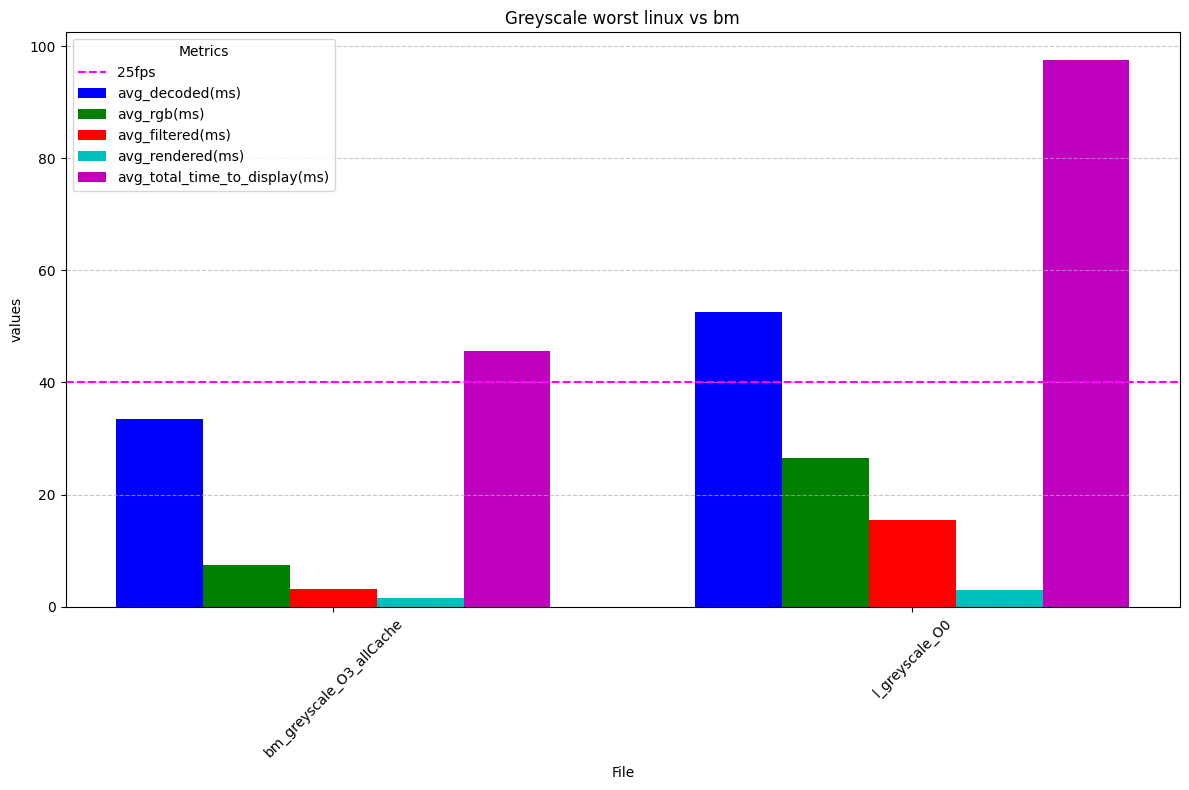

In [16]:
x = np.arange(len(best_bm_worst_l_greyscale_df.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(best_bm_worst_l_greyscale_df.columns):
    plt.bar(x + i * bar_width, best_bm_worst_l_greyscale_df[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(best_bm_worst_l_greyscale_df.columns) - 1) * bar_width / 2, best_bm_worst_l_greyscale_df.index, rotation=45)
plt.title('Greyscale worst linux vs bm')
plt.xlabel('File')
plt.ylabel('values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.legend(title="Metrics")
plt.tight_layout()

plt.show()

In [17]:
best_bm_worst_l_sobel_df = pd.concat([
    avg_df[avg_df.index == 'bm_sobelFSqrt_O3_allCache'],
    avg_df[avg_df.index == 'l_sobel_O0']
])

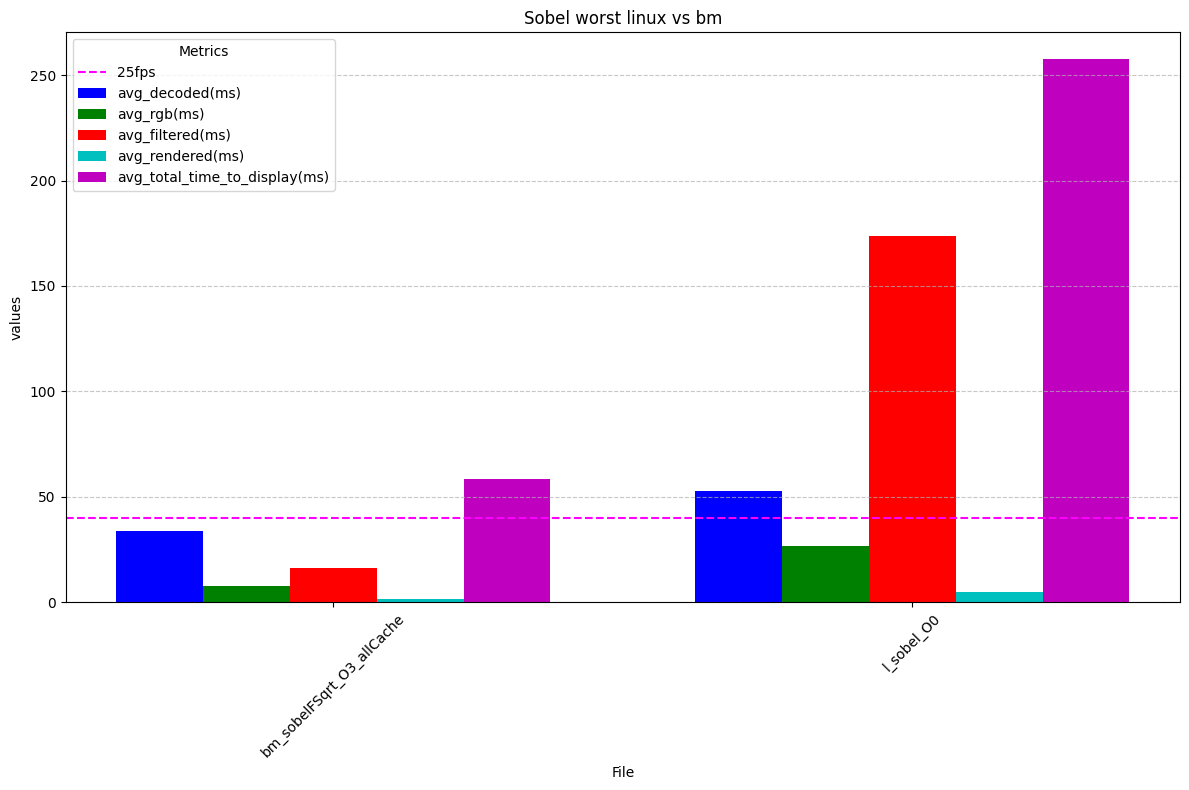

In [18]:
x = np.arange(len(best_bm_worst_l_sobel_df.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(best_bm_worst_l_sobel_df.columns):
    plt.bar(x + i * bar_width, best_bm_worst_l_sobel_df[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(best_bm_worst_l_sobel_df.columns) - 1) * bar_width / 2, best_bm_worst_l_sobel_df.index, rotation=45)
plt.title('Sobel worst linux vs bm')
plt.xlabel('File')
plt.ylabel('values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.legend(title="Metrics")
plt.tight_layout()

plt.show()

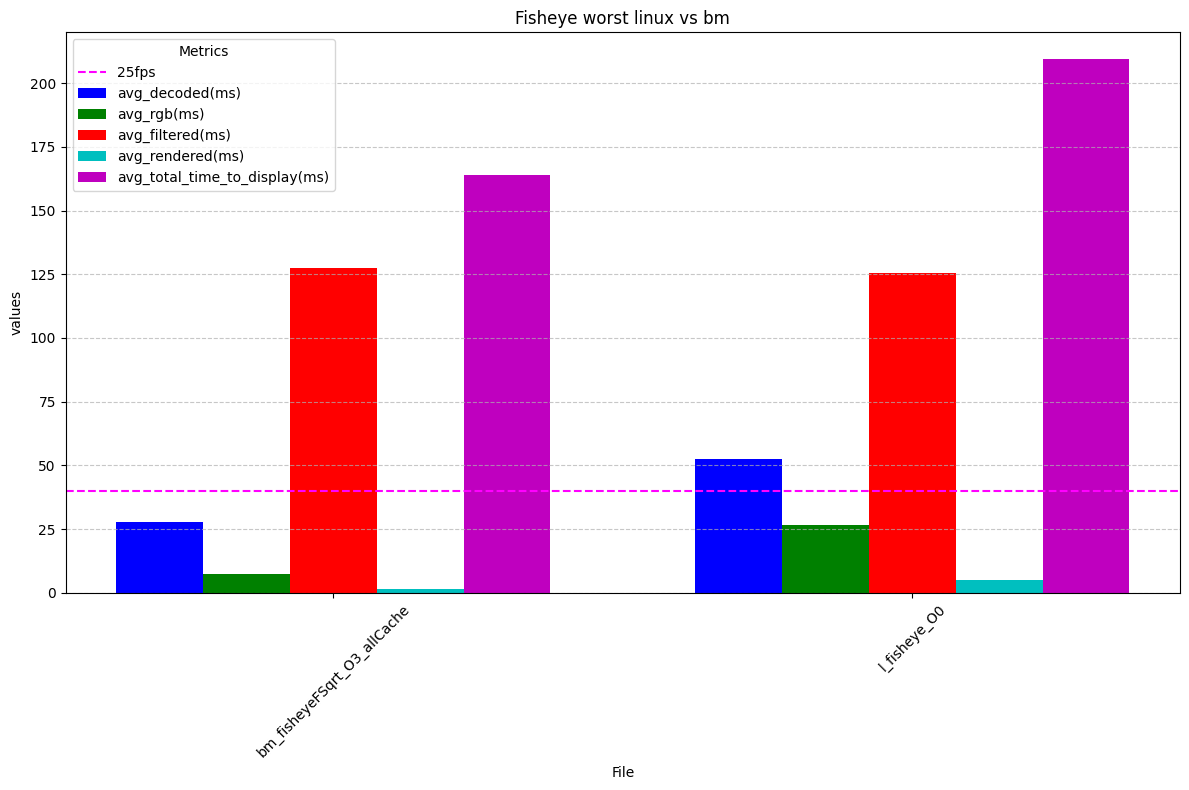

In [19]:
best_bm_worst_l_sobel_df = pd.concat([
    avg_df[avg_df.index == 'bm_fisheyeFSqrt_O3_allCache'],
    avg_df[avg_df.index == 'l_fisheye_O0']
])

x = np.arange(len(best_bm_worst_l_sobel_df.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(best_bm_worst_l_sobel_df.columns):
    plt.bar(x + i * bar_width, best_bm_worst_l_sobel_df[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(best_bm_worst_l_sobel_df.columns) - 1) * bar_width / 2, best_bm_worst_l_sobel_df.index, rotation=45)
plt.title('Fisheye worst linux vs bm')
plt.xlabel('File')
plt.ylabel('values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.legend(title="Metrics")
plt.tight_layout()

plt.show()

The video should be playing for 14.04 seconds at 25 frames per second.
these is always some amount of slow frames but on bm they are all slow and slow here being more the 40 ms needed to be the average in order to hit the desired framerate

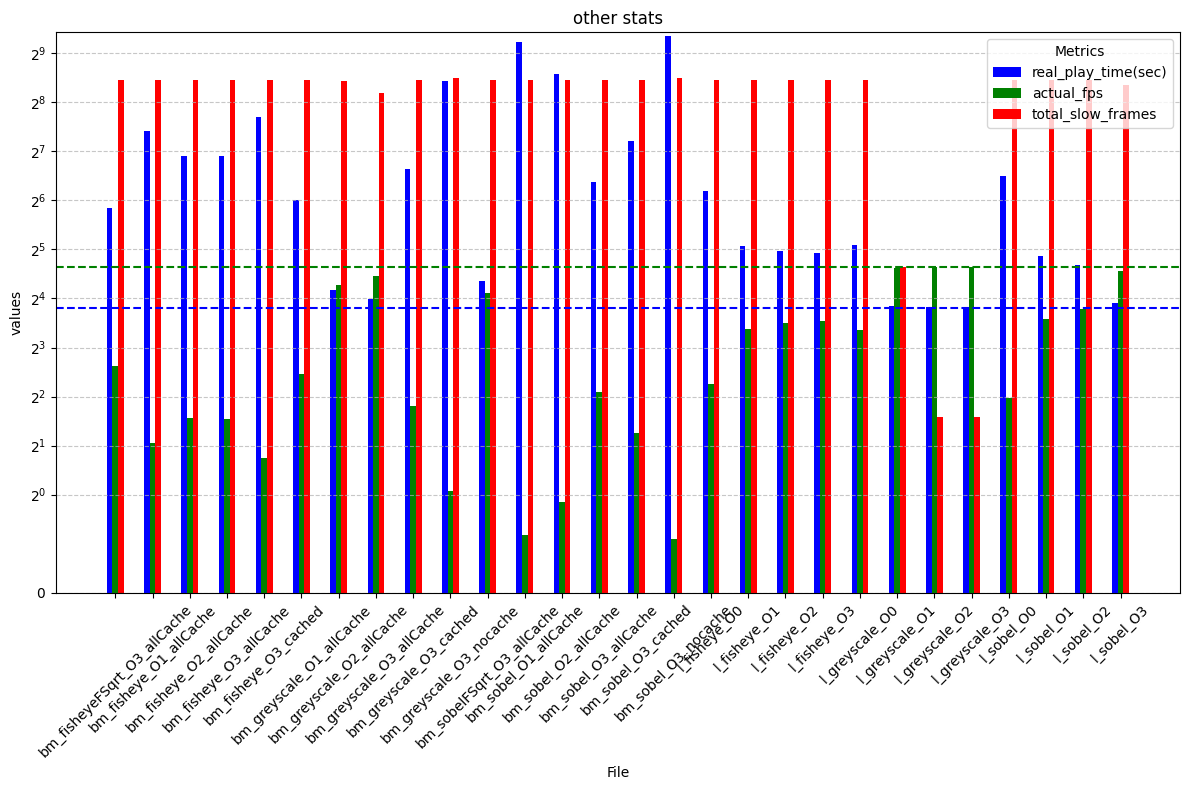

In [20]:
x = np.arange(len(df_sum.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(df_sum.columns):
    plt.bar(x + i * bar_width, df_sum[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(df_sum.columns) - 1) * bar_width / 2, df_sum.index, rotation=45)
plt.yscale('symlog', base=2, linthresh=1)
plt.title('other stats')
plt.xlabel('File')
plt.ylabel('values')
plt.legend(title="Metrics")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=25, color='green', linestyle='--', label='25fps')
plt.axhline(y=14, color='blue', linestyle='--', label='14sec')
plt.tight_layout()

plt.show()

In [21]:
def count_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return outliers

- bm has fewer outliers in sobel dislplay, sobel  convert RGB (greyscale has significantly more), and filter

l_fisheye_O0, decode(ms): 6
l_fisheye_O1, decode(ms): 6
l_fisheye_O2, decode(ms): 5
l_fisheye_O3, decode(ms): 5
l_greyscale_O0, decode(ms): 6
l_greyscale_O1, decode(ms): 8
l_greyscale_O2, decode(ms): 6
l_greyscale_O3, decode(ms): 6
l_sobel_O0, decode(ms): 6
l_sobel_O1, decode(ms): 8
l_sobel_O2, decode(ms): 7
l_sobel_O3, decode(ms): 7
bm_fisheyeFSqrt_O3_allCache, decode(ms): 14


/tmp/ipykernel_113823/3402738605.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_linux.set_xticklabels([df_obj.name for df_obj in l_dfs], rotation=45, ha='right')


bm_fisheye_O1_allCache, decode(ms): 7
bm_fisheye_O2_allCache, decode(ms): 10
bm_fisheye_O3_allCache, decode(ms): 14
bm_fisheye_O3_cached, decode(ms): 5
bm_greyscale_O1_allCache, decode(ms): 7
bm_greyscale_O2_allCache, decode(ms): 10
bm_greyscale_O3_allCache, decode(ms): 21
bm_greyscale_O3_cached, decode(ms): 5
bm_greyscale_O3_nocache, decode(ms): 16
bm_sobelFSqrt_O3_allCache, decode(ms): 21
bm_sobel_O1_allCache, decode(ms): 7
bm_sobel_O2_allCache, decode(ms): 11
bm_sobel_O3_allCache, decode(ms): 21
bm_sobel_O3_cached, decode(ms): 5
bm_sobel_O3_nocache, decode(ms): 17


/tmp/ipykernel_113823/3402738605.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bm.set_xticklabels([df_obj.name for df_obj in bm_dfs], rotation=45, ha='right')
/tmp/ipykernel_113823/3402738605.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_linux.set_xticklabels([df_obj.name for df_obj in l_dfs], rotation=45, ha='right')


l_fisheye_O0, convert_rgb(ms): 4
l_fisheye_O1, convert_rgb(ms): 11
l_fisheye_O2, convert_rgb(ms): 24
l_fisheye_O3, convert_rgb(ms): 5
l_greyscale_O0, convert_rgb(ms): 26
l_greyscale_O1, convert_rgb(ms): 17
l_greyscale_O2, convert_rgb(ms): 9
l_greyscale_O3, convert_rgb(ms): 11
l_sobel_O0, convert_rgb(ms): 29
l_sobel_O1, convert_rgb(ms): 15
l_sobel_O2, convert_rgb(ms): 6
l_sobel_O3, convert_rgb(ms): 22
bm_fisheyeFSqrt_O3_allCache, convert_rgb(ms): 3
bm_fisheye_O1_allCache, convert_rgb(ms): 20
bm_fisheye_O2_allCache, convert_rgb(ms): 27
bm_fisheye_O3_allCache, convert_rgb(ms): 8
bm_fisheye_O3_cached, convert_rgb(ms): 2
bm_greyscale_O1_allCache, convert_rgb(ms): 3
bm_greyscale_O2_allCache, convert_rgb(ms): 0
bm_greyscale_O3_allCache, convert_rgb(ms): 11
bm_greyscale_O3_cached, convert_rgb(ms): 166
bm_greyscale_O3_nocache, convert_rgb(ms): 56
bm_sobelFSqrt_O3_allCache, convert_rgb(ms): 8
bm_sobel_O1_allCache, convert_rgb(ms): 1
bm_sobel_O2_allCache, convert_rgb(ms): 6
bm_sobel_O3_allCache, 

/tmp/ipykernel_113823/3402738605.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bm.set_xticklabels([df_obj.name for df_obj in bm_dfs], rotation=45, ha='right')
/tmp/ipykernel_113823/3402738605.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_linux.set_xticklabels([df_obj.name for df_obj in l_dfs], rotation=45, ha='right')


l_fisheye_O0, filter(ms): 30
l_fisheye_O1, filter(ms): 18
l_fisheye_O2, filter(ms): 13
l_fisheye_O3, filter(ms): 22
l_greyscale_O0, filter(ms): 0
l_greyscale_O1, filter(ms): 68
l_greyscale_O2, filter(ms): 35
l_greyscale_O3, filter(ms): 37
l_sobel_O0, filter(ms): 21
l_sobel_O1, filter(ms): 15
l_sobel_O2, filter(ms): 14
l_sobel_O3, filter(ms): 21
bm_fisheyeFSqrt_O3_allCache, filter(ms): 75
bm_fisheye_O1_allCache, filter(ms): 79
bm_fisheye_O2_allCache, filter(ms): 1
bm_fisheye_O3_allCache, filter(ms): 0
bm_fisheye_O3_cached, filter(ms): 12
bm_greyscale_O1_allCache, filter(ms): 84
bm_greyscale_O2_allCache, filter(ms): 6
bm_greyscale_O3_allCache, filter(ms): 7
bm_greyscale_O3_cached, filter(ms): 0
bm_greyscale_O3_nocache, filter(ms): 0
bm_sobelFSqrt_O3_allCache, filter(ms): 14
bm_sobel_O1_allCache, filter(ms): 37
bm_sobel_O2_allCache, filter(ms): 1
bm_sobel_O3_allCache, filter(ms): 0
bm_sobel_O3_cached, filter(ms): 2
bm_sobel_O3_nocache, filter(ms): 10
l_fisheye_O0, display(ms): 49
l_fishey

/tmp/ipykernel_113823/3402738605.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bm.set_xticklabels([df_obj.name for df_obj in bm_dfs], rotation=45, ha='right')
/tmp/ipykernel_113823/3402738605.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_linux.set_xticklabels([df_obj.name for df_obj in l_dfs], rotation=45, ha='right')


l_sobel_O0, display(ms): 18
l_sobel_O1, display(ms): 14
l_sobel_O2, display(ms): 17
l_sobel_O3, display(ms): 30
bm_fisheyeFSqrt_O3_allCache, display(ms): 67
bm_fisheye_O1_allCache, display(ms): 8
bm_fisheye_O2_allCache, display(ms): 0
bm_fisheye_O3_allCache, display(ms): 0
bm_fisheye_O3_cached, display(ms): 5
bm_greyscale_O1_allCache, display(ms): 0
bm_greyscale_O2_allCache, display(ms): 16
bm_greyscale_O3_allCache, display(ms): 18
bm_greyscale_O3_cached, display(ms): 30
bm_greyscale_O3_nocache, display(ms): 62
bm_sobelFSqrt_O3_allCache, display(ms): 8
bm_sobel_O1_allCache, display(ms): 1
bm_sobel_O2_allCache, display(ms): 11
bm_sobel_O3_allCache, display(ms): 14
bm_sobel_O3_cached, display(ms): 1
bm_sobel_O3_nocache, display(ms): 17
l_fisheye_O0, time_in_callback(ms): 6
l_fisheye_O1, time_in_callback(ms): 7
l_fisheye_O2, time_in_callback(ms): 6
l_fisheye_O3, time_in_callback(ms): 6
l_greyscale_O0, time_in_callback(ms): 7
l_greyscale_O1, time_in_callback(ms): 11
l_greyscale_O2, time_in

/tmp/ipykernel_113823/3402738605.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bm.set_xticklabels([df_obj.name for df_obj in bm_dfs], rotation=45, ha='right')
/tmp/ipykernel_113823/3402738605.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_linux.set_xticklabels([df_obj.name for df_obj in l_dfs], rotation=45, ha='right')


l_greyscale_O3, time_in_callback(ms): 11
l_sobel_O0, time_in_callback(ms): 6
l_sobel_O1, time_in_callback(ms): 8
l_sobel_O2, time_in_callback(ms): 8
l_sobel_O3, time_in_callback(ms): 9
bm_fisheyeFSqrt_O3_allCache, time_in_callback(ms): 21
bm_fisheye_O1_allCache, time_in_callback(ms): 7
bm_fisheye_O2_allCache, time_in_callback(ms): 13
bm_fisheye_O3_allCache, time_in_callback(ms): 18
bm_fisheye_O3_cached, time_in_callback(ms): 10
bm_greyscale_O1_allCache, time_in_callback(ms): 7
bm_greyscale_O2_allCache, time_in_callback(ms): 10
bm_greyscale_O3_allCache, time_in_callback(ms): 21
bm_greyscale_O3_cached, time_in_callback(ms): 10
bm_greyscale_O3_nocache, time_in_callback(ms): 16
bm_sobelFSqrt_O3_allCache, time_in_callback(ms): 21
bm_sobel_O1_allCache, time_in_callback(ms): 7
bm_sobel_O2_allCache, time_in_callback(ms): 11
bm_sobel_O3_allCache, time_in_callback(ms): 21
bm_sobel_O3_cached, time_in_callback(ms): 6
bm_sobel_O3_nocache, time_in_callback(ms): 16


/tmp/ipykernel_113823/3402738605.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_bm.set_xticklabels([df_obj.name for df_obj in bm_dfs], rotation=45, ha='right')


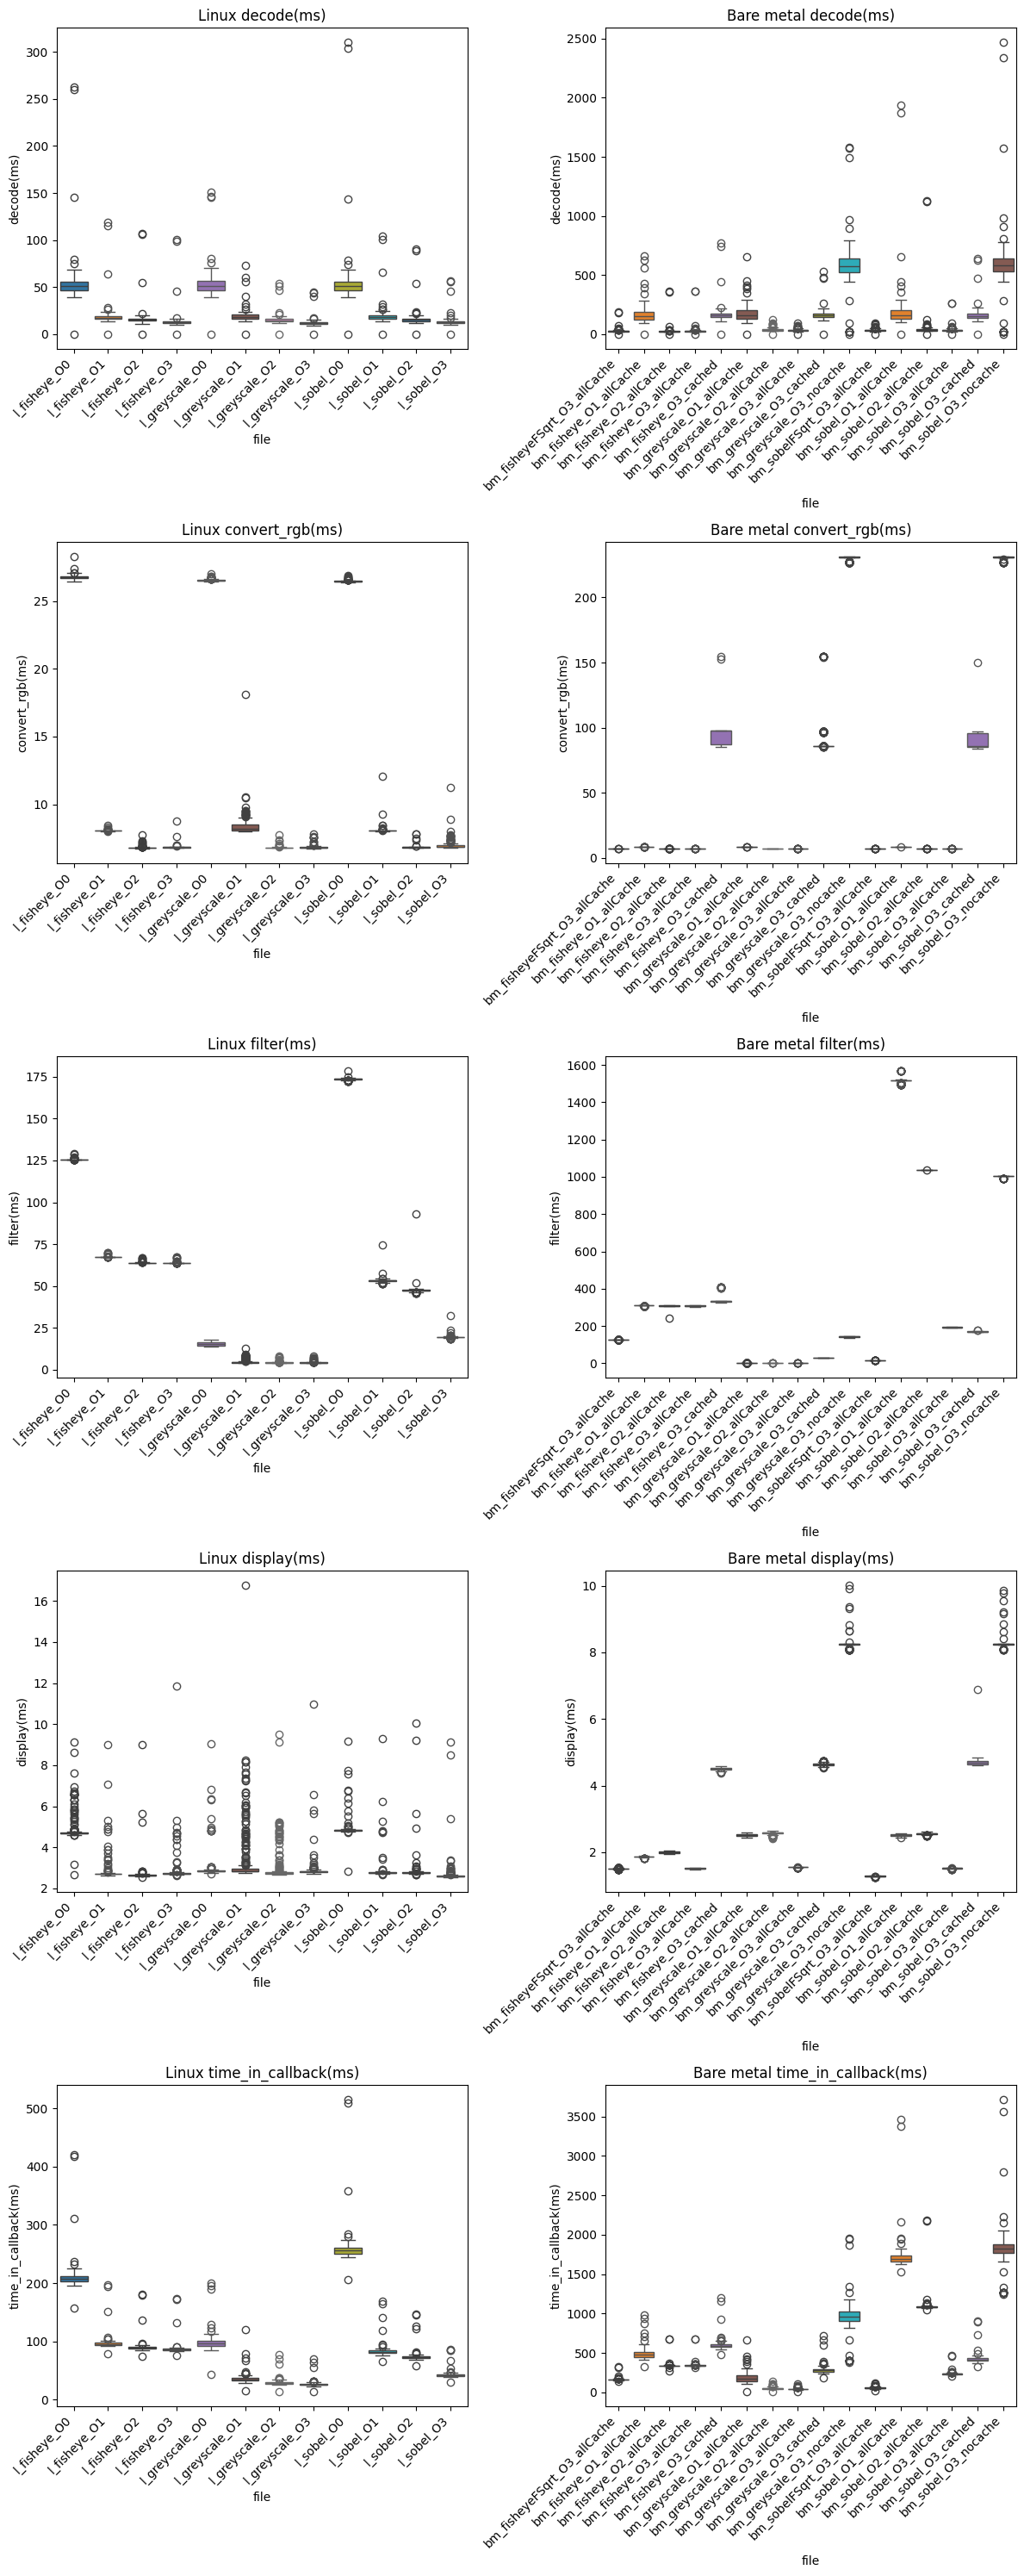

In [ ]:
num_cols = len(dfs[0].df.columns) - 1
fig, axes = plt.subplots(num_cols, 2, figsize=(12, 6 * num_cols))

l_dfs = [df_obj for df_obj in dfs if df_obj.name.startswith('l_')]
bm_dfs = [df_obj for df_obj in dfs if df_obj.name.startswith('bm_')]

for i, column in enumerate(dfs[0].df.columns):
    if column != 'file':
        ax_linux = axes[i, 0]  
        ax_bm = axes[i, 1] 

        for df_obj in l_dfs:
            sns.boxplot(x='file', y=column, data=df_obj.df, ax=ax_linux)
            print(f"{df_obj.name}, {column}: {count_outliers(df_obj.df[column])}")
        ax_linux.set_xticklabels([df_obj.name for df_obj in l_dfs], rotation=45, ha='right')
        ax_linux.set_title(f'Linux {column}')

        for df_obj in bm_dfs:
            sns.boxplot(x='file', y=column, data=df_obj.df, ax=ax_bm)
            print(f"{df_obj.name}, {column}: {count_outliers(df_obj.df[column])}")
        ax_bm.set_xticklabels([df_obj.name for df_obj in bm_dfs], rotation=45, ha='right')
        ax_bm.set_title(f'Bare metal {column}')

plt.tight_layout()
plt.show()

In [23]:
stats = ['decode(ms)', 'convert_rgb(ms)', 'filter(ms)', 'display(ms)', 'time_in_callback(ms)']
dec_dict = {}
rgb_dict = {}
fil_dict = {}
ren_dict = {}
tot_dict = {}

for stat in stats:
    for df_obj in dfs:
        if stat in df_obj.df.columns:
            values = df_obj.df[stat].reset_index(drop=True)
            if stat == 'decode(ms)':
                dec_dict[df_obj.name] = values
            elif stat == 'convert_rgb(ms)':
                rgb_dict[df_obj.name] = values
            elif stat == 'filter(ms)':
                fil_dict[df_obj.name] = values
            elif stat == 'display(ms)':
                ren_dict[df_obj.name] = values
            elif stat == 'time_in_callback(ms)':
                tot_dict[df_obj.name] = values

dec_df = pd.DataFrame(dec_dict)
rgb_df = pd.DataFrame(rgb_dict)
fil_df = pd.DataFrame(fil_dict)
ren_df = pd.DataFrame(ren_dict)
tot_df = pd.DataFrame(tot_dict)


In [24]:
dec_df.head(6)

bm_fisheyeFSqrt_O3_allCache  bm_fisheye_O1_allCache  \
0                       73.894                 624.394   
1                       22.840                 164.083   
2                       20.147                 138.796   
3                       23.978                 168.384   
4                       22.675                 163.051   
5                       24.785                 186.521   

   bm_fisheye_O2_allCache  bm_fisheye_O3_allCache  bm_fisheye_O3_cached  \
0                  60.859                  73.848               446.255   
1                  21.230                  22.816               159.562   
2                  18.212                  20.103               135.122   
3                  22.239                  23.968               166.166   
4                  21.306                  22.696               159.497   
5                  23.167                  24.835               177.708   

   bm_greyscale_O1_allCache  bm_greyscale_O2_allCache  \
0                   656.228                   124.522   
1                   175.623                    35.385   
2                   149.439                    30.128   
3                   181.470                    36.763   
4                   175.265                    35.365   
5                   200.629                    39.808   

   bm_greyscale_O3_allCache  bm_greyscale_O3_cached  bm_greyscale_O3_nocache  \
0                    93.050                 480.709                 1574.889   
1                    27.230                 168.979                  522.543   
2                    23.396                 143.612                  439.914   
3                    28.777                 176.075                  559.263   
4                    27.398                 169.129                  535.603   
5                    30.189                 182.500                  596.872   

   ...  l_fisheye_O2  l_fisheye_O3  l_greyscale_O0  l_greyscale_O1  \
0  ...       54.4679       45.6311        146.1870         73.1767   
1  ...       16.3892       12.1565         49.0195         40.1301   
2  ...       14.1868       11.1096         44.1108         16.6234   
3  ...       16.6071       13.4831         51.1977         19.6882   
4  ...       15.4572       12.5553         49.0217         19.5195   
5  ...       17.0027       13.5907         52.8795         20.6913   

   l_greyscale_O2  l_greyscale_O3  l_sobel_O0  l_sobel_O1  l_sobel_O2  \
0         53.7487         44.4947    143.9480     66.1434     53.7041   
1         15.3245         11.9704     48.8434     18.2555     15.2245   
2         13.5648         12.1138     42.6554     15.8016     17.4436   
3         15.8987         13.7636     49.2468     19.2861     16.0980   
4         15.3403         12.5683     47.8632     17.8597     15.3945   
5         16.3232         13.8413     52.1914     19.3670     16.1834   

   l_sobel_O3  
0     45.6533  
1     12.1556  
2     10.3784  
3     13.7108  
4     13.3248  
5     14.0729  

[6 rows x 28 columns]

In [25]:
print("\nDECODE")
print(dec_df.describe())
print("\nRGB CONVERT")
print(rgb_df.describe())
print("\nFILTER")
print(fil_df.describe())
print("\nDISPLAY")
print(ren_df.describe())
print("\nTOTAL")
print(tot_df.describe())


DECODE
       bm_fisheyeFSqrt_O3_allCache  bm_fisheye_O1_allCache  \
count                   352.000000              352.000000   
mean                     27.594406              163.807719   
std                      13.008474               62.874247   
min                       0.001000                0.004000   
25%                      23.079250              125.037000   
50%                      25.768000              152.748000   
75%                      28.955000              191.625500   
max                     186.507000              661.593000   

       bm_fisheye_O2_allCache  bm_fisheye_O3_allCache  bm_fisheye_O3_cached  \
count              352.000000              352.000000            352.000000   
mean                24.651091               28.656116            162.201287   
std                 25.649983               25.804292             52.215691   
min                  0.003000                0.002000              0.002000   
25%                 20.313500         

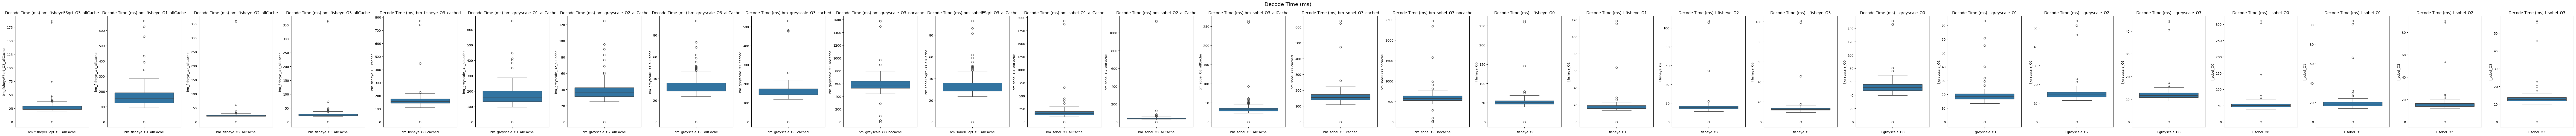

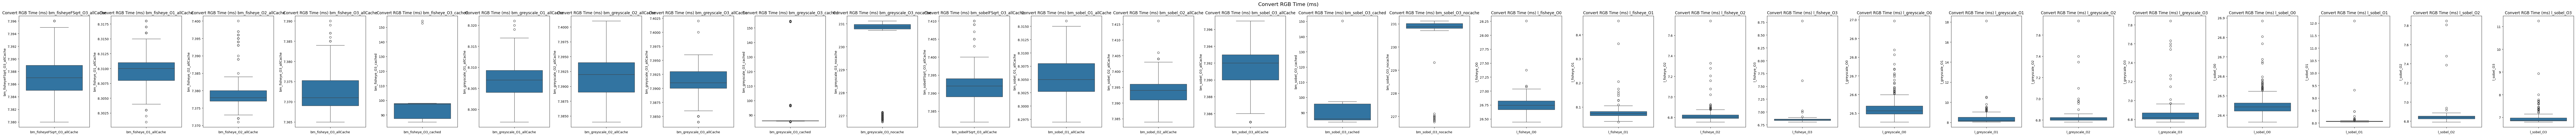

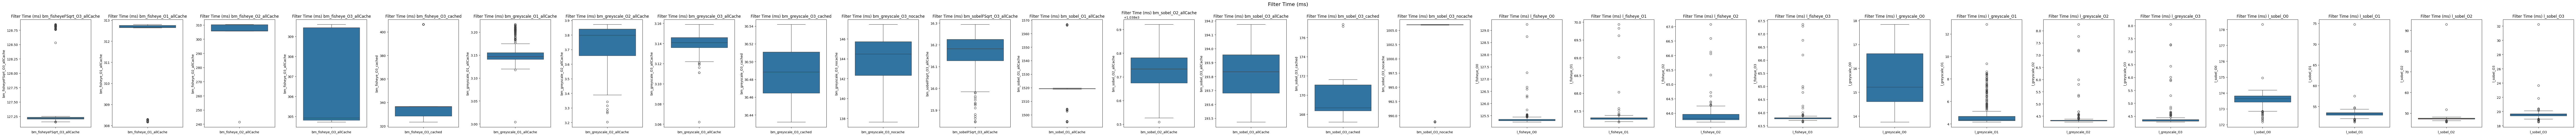

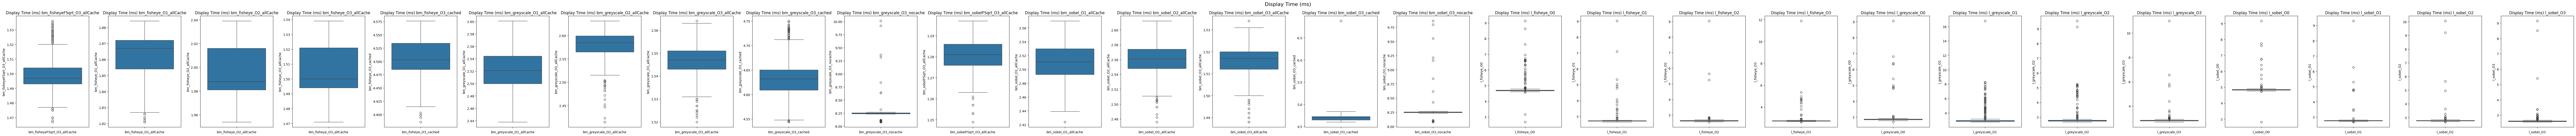

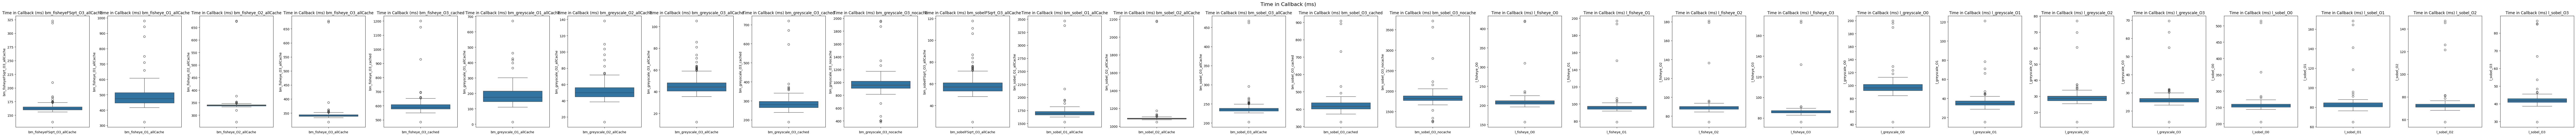

In [ ]:
def plot_boxplots(df, title):
    num_cols = len(df.columns)
    fig, axes = plt.subplots(1, num_cols, figsize=(4 * num_cols, 6)) 

    for i, column in enumerate(df.columns):
        sns.boxplot(y=df[column], ax=axes[i])  
        axes[i].set_title(f'{title} {column}') 
        axes[i].set_xlabel(column)  

    fig.suptitle(title, fontsize=16)  
    plt.tight_layout()
    plt.show()

plot_boxplots(dec_df, 'Decode Time (ms)')
plot_boxplots(rgb_df, 'Convert RGB Time (ms)')
plot_boxplots(fil_df, 'Filter Time (ms)')
plot_boxplots(ren_df, 'Display Time (ms)')
plot_boxplots(tot_df, 'Time in Callback (ms)')

In [27]:
dec_df.head(6)

bm_fisheyeFSqrt_O3_allCache  bm_fisheye_O1_allCache  \
0                       73.894                 624.394   
1                       22.840                 164.083   
2                       20.147                 138.796   
3                       23.978                 168.384   
4                       22.675                 163.051   
5                       24.785                 186.521   

   bm_fisheye_O2_allCache  bm_fisheye_O3_allCache  bm_fisheye_O3_cached  \
0                  60.859                  73.848               446.255   
1                  21.230                  22.816               159.562   
2                  18.212                  20.103               135.122   
3                  22.239                  23.968               166.166   
4                  21.306                  22.696               159.497   
5                  23.167                  24.835               177.708   

   bm_greyscale_O1_allCache  bm_greyscale_O2_allCache  \
0                   656.228                   124.522   
1                   175.623                    35.385   
2                   149.439                    30.128   
3                   181.470                    36.763   
4                   175.265                    35.365   
5                   200.629                    39.808   

   bm_greyscale_O3_allCache  bm_greyscale_O3_cached  bm_greyscale_O3_nocache  \
0                    93.050                 480.709                 1574.889   
1                    27.230                 168.979                  522.543   
2                    23.396                 143.612                  439.914   
3                    28.777                 176.075                  559.263   
4                    27.398                 169.129                  535.603   
5                    30.189                 182.500                  596.872   

   ...  l_fisheye_O2  l_fisheye_O3  l_greyscale_O0  l_greyscale_O1  \
0  ...       54.4679       45.6311        146.1870         73.1767   
1  ...       16.3892       12.1565         49.0195         40.1301   
2  ...       14.1868       11.1096         44.1108         16.6234   
3  ...       16.6071       13.4831         51.1977         19.6882   
4  ...       15.4572       12.5553         49.0217         19.5195   
5  ...       17.0027       13.5907         52.8795         20.6913   

   l_greyscale_O2  l_greyscale_O3  l_sobel_O0  l_sobel_O1  l_sobel_O2  \
0         53.7487         44.4947    143.9480     66.1434     53.7041   
1         15.3245         11.9704     48.8434     18.2555     15.2245   
2         13.5648         12.1138     42.6554     15.8016     17.4436   
3         15.8987         13.7636     49.2468     19.2861     16.0980   
4         15.3403         12.5683     47.8632     17.8597     15.3945   
5         16.3232         13.8413     52.1914     19.3670     16.1834   

   l_sobel_O3  
0     45.6533  
1     12.1556  
2     10.3784  
3     13.7108  
4     13.3248  
5     14.0729  

[6 rows x 28 columns]


DECODE
bm_fisheyeFSqrt_O3_allCache     67.990205
bm_fisheye_O1_allCache          53.511835
bm_fisheye_O2_allCache         147.520093
bm_fisheye_O3_allCache         128.610900
bm_fisheye_O3_cached            42.705367
bm_greyscale_O1_allCache        45.793485
bm_greyscale_O2_allCache        39.303344
bm_greyscale_O3_allCache        34.655934
bm_greyscale_O3_cached          28.860932
bm_greyscale_O3_nocache         27.796289
bm_sobelFSqrt_O3_allCache       36.249189
bm_sobel_O1_allCache           108.844960
bm_sobel_O2_allCache           264.617572
bm_sobel_O3_allCache            77.709123
bm_sobel_O3_cached              35.362607
bm_sobel_O3_nocache             38.992283
l_fisheye_O0                    46.959072
l_fisheye_O1                    60.274526
l_fisheye_O2                    62.610712
l_fisheye_O3                    71.656569
l_greyscale_O0                  28.525017
l_greyscale_O1                  31.196180
l_greyscale_O2                  31.932908
l_greyscale_O3            

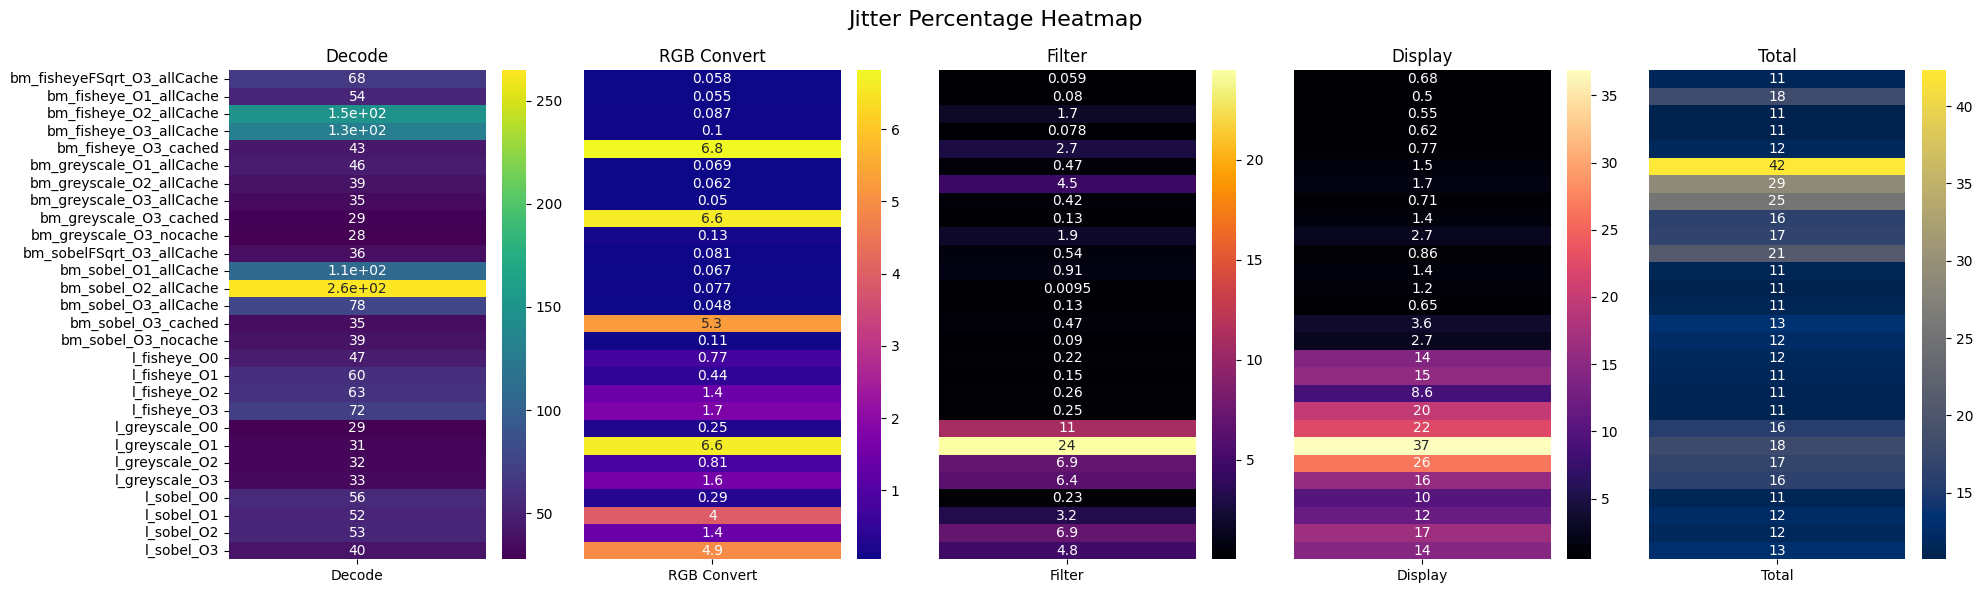

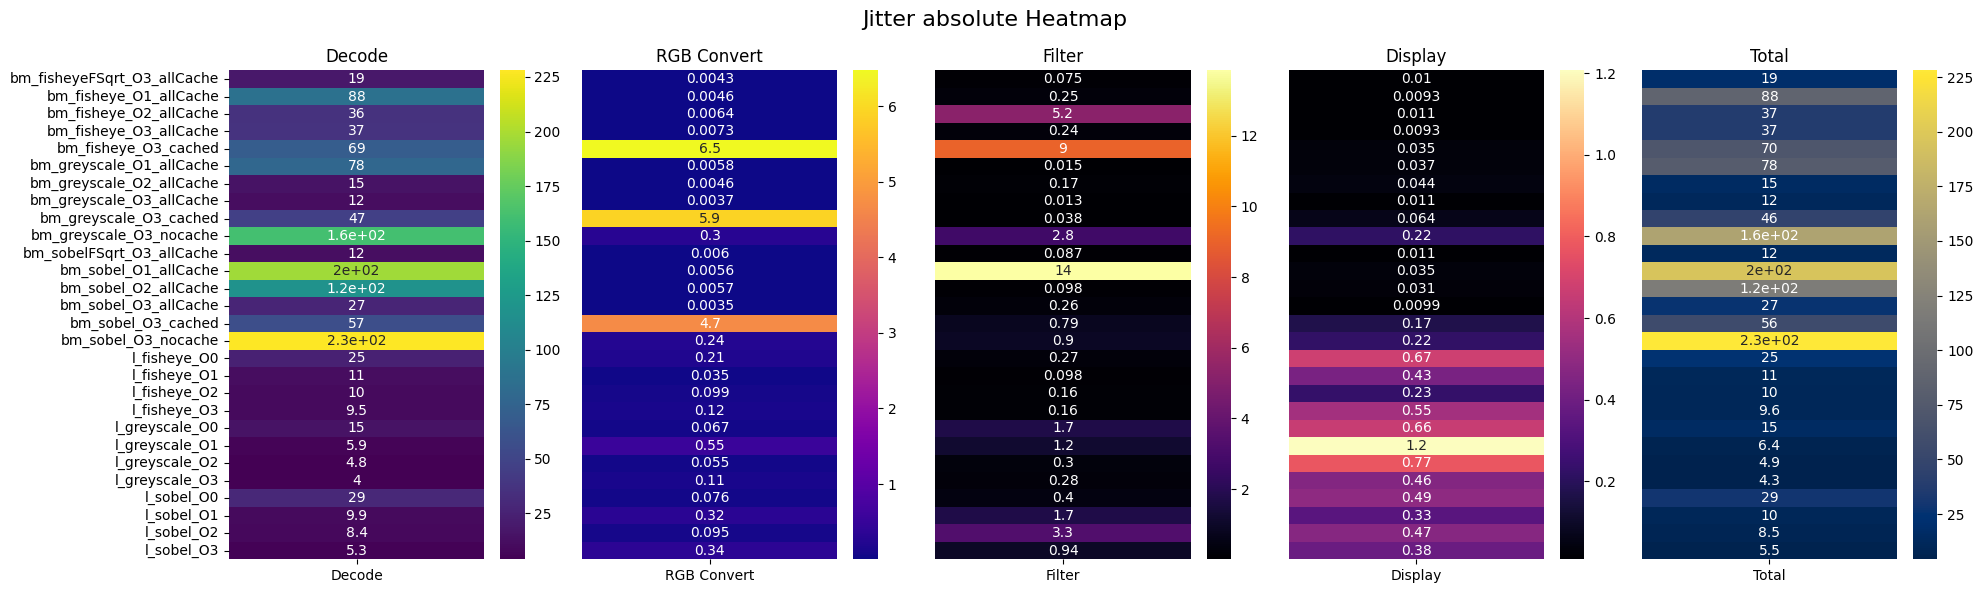

In [ ]:
def calculate_jitter_percentage(data):
    """jitter as percentage of the average"""
    diffs = data.diff()
    jitter = diffs.std()
    average_value = data.mean()
    jitter_percentage = (jitter / average_value) * 100
    return jitter_percentage

def calculate_jitter_absolute(data):
    diffs = data.diff()
    absolute_jitter = diffs.std()
    return absolute_jitter

print("\nDECODE")
print(dec_df.apply(calculate_jitter_percentage, axis=0))
print("\nRGB CONVERT")
print(rgb_df.apply(calculate_jitter_percentage, axis=0))
print("\nFILTER")
print(fil_df.apply(calculate_jitter_percentage, axis=0))
print("\nDISPLAY")
print(ren_df.apply(calculate_jitter_percentage, axis=0))
print("\nTOTAL")
print(tot_df.apply(calculate_jitter_percentage, axis=0))

jitter_df = pd.concat([dec_df.apply(calculate_jitter_percentage, axis=0),
                       rgb_df.apply(calculate_jitter_percentage, axis=0),
                       fil_df.apply(calculate_jitter_percentage, axis=0),
                       ren_df.apply(calculate_jitter_percentage, axis=0),
                       tot_df.apply(calculate_jitter_percentage, axis=0)], axis=1)
colormaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']
# Rename the columns for clarity
jitter_df.columns = ['Decode', 'RGB Convert', 'Filter', 'Display', 'Total']

num_cols = len(jitter_df.columns)
fig, axes = plt.subplots(1, num_cols, figsize=(4 * num_cols, 6)) 

yticklabels = jitter_df.index

for i, col in enumerate(jitter_df.columns):
    sns.heatmap(jitter_df[[col]], annot=True, cmap=colormaps[i % len(colormaps)], ax=axes[i],
                yticklabels=yticklabels)  

    axes[i].set_title(f'{col}') 
    axes[i].set_xlabel('') 

    yticklabels = False

fig.suptitle('Jitter Percentage Heatmap', fontsize=16) 
plt.tight_layout()
plt.show()

jitter_df = pd.concat([dec_df.apply(calculate_jitter_absolute, axis=0),
                       rgb_df.apply(calculate_jitter_absolute, axis=0),
                       fil_df.apply(calculate_jitter_absolute, axis=0),
                       ren_df.apply(calculate_jitter_absolute, axis=0),
                       tot_df.apply(calculate_jitter_absolute, axis=0)], axis=1)
jitter_df.columns = ['Decode', 'RGB Convert', 'Filter', 'Display', 'Total']

yticklabels = jitter_df.index

fig, axes = plt.subplots(1, num_cols, figsize=(4 * num_cols, 6)) 
for i, col in enumerate(jitter_df.columns):
    sns.heatmap(jitter_df[[col]], annot=True, cmap=colormaps[i % len(colormaps)], ax=axes[i],
                yticklabels=(yticklabels if i == 0 else False)) 

    axes[i].set_title(f'{col}')  
    axes[i].set_xlabel('') 


fig.suptitle('Jitter absolute Heatmap', fontsize=16)  
plt.tight_layout()
plt.show()

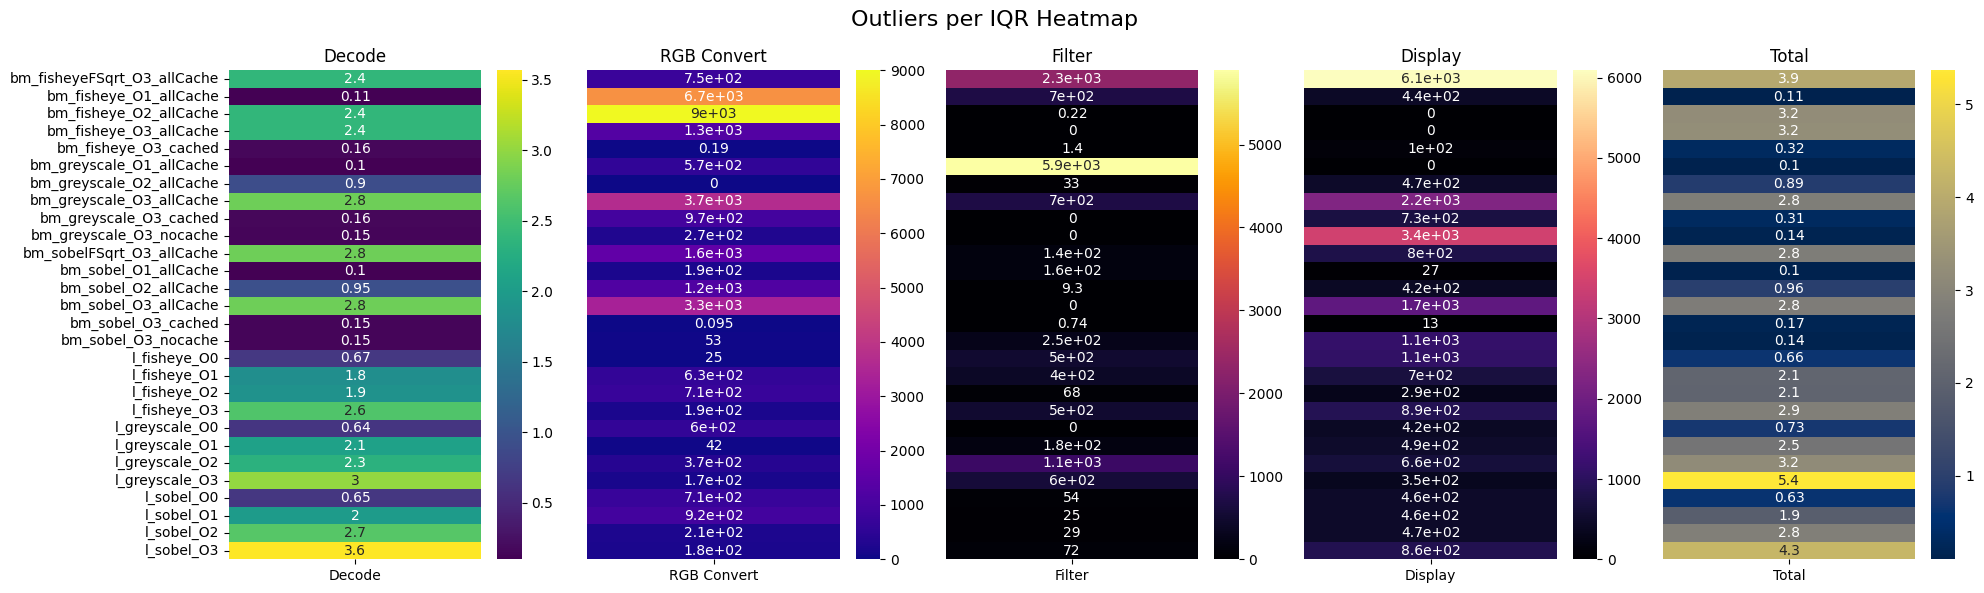

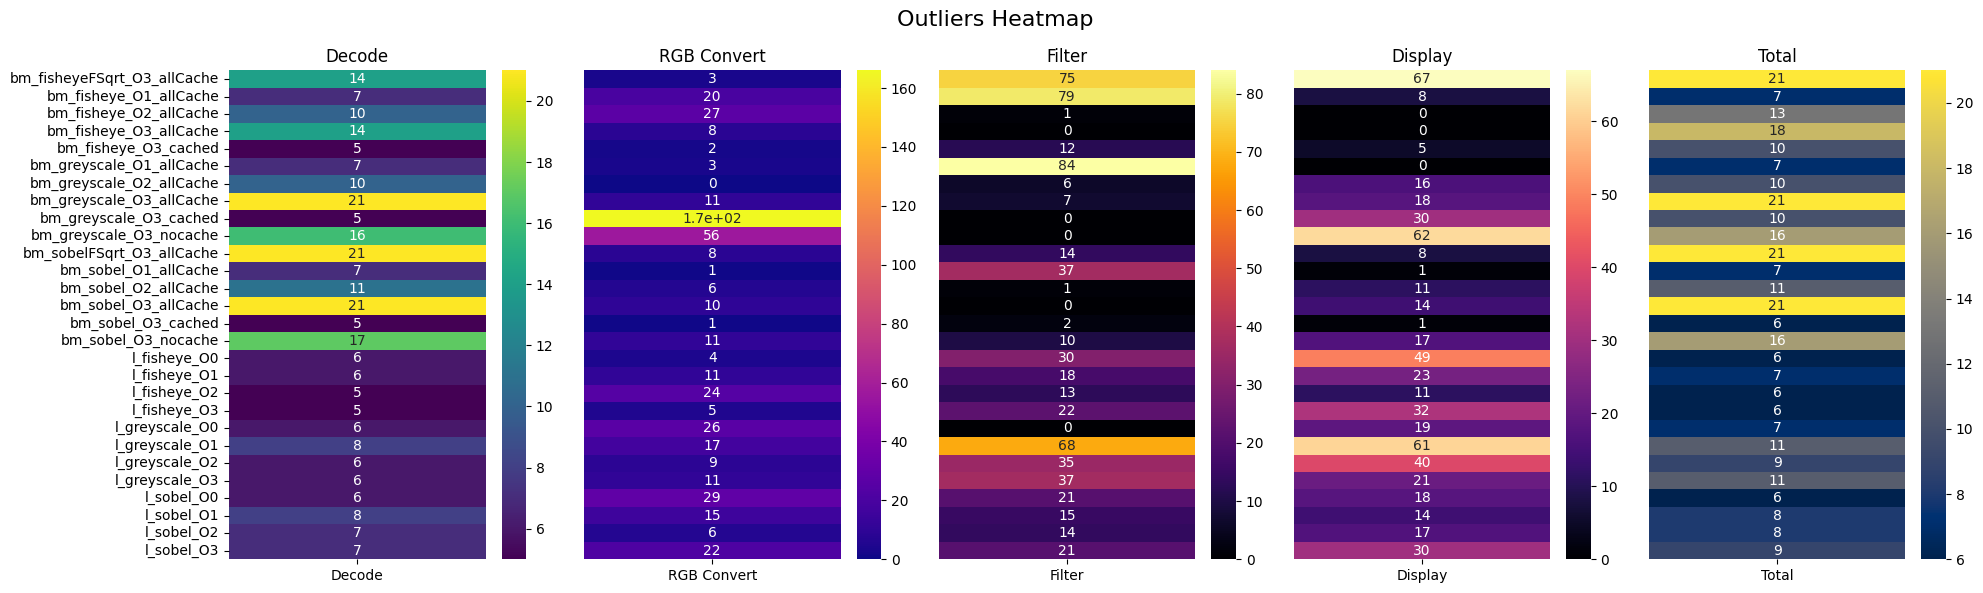

In [ ]:
def count_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
    return outliers

def calculate_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

def outliers_per_iqr(df):
    outliers = count_outliers(df)
    iqr = calculate_iqr(df)
    return outliers / iqr

outlier_df = pd.concat([
    dec_df.apply(outliers_per_iqr, axis=0),
    rgb_df.apply(outliers_per_iqr, axis=0),
    fil_df.apply(outliers_per_iqr, axis=0),
    ren_df.apply(outliers_per_iqr, axis=0),
    tot_df.apply(outliers_per_iqr, axis=0)
], axis=1)

outlier_df.columns = ['Decode', 'RGB Convert', 'Filter', 'Display', 'Total']

num_cols = len(outlier_df.columns)
fig, axes = plt.subplots(1, num_cols, figsize=(4 * num_cols, 6)) 

yticklabels = outlier_df.index

for i, col in enumerate(outlier_df.columns):
    sns.heatmap(outlier_df[[col]], annot=True, cmap=colormaps[i % len(colormaps)], ax=axes[i],
                yticklabels=yticklabels)
    
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    
    yticklabels = False 

fig.suptitle('Outliers per IQR Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


outlier_df = pd.concat([
    dec_df.apply(count_outliers, axis=0),
    rgb_df.apply(count_outliers, axis=0),
    fil_df.apply(count_outliers, axis=0),
    ren_df.apply(count_outliers, axis=0),
    tot_df.apply(count_outliers, axis=0)
], axis=1)

outlier_df.columns = ['Decode', 'RGB Convert', 'Filter', 'Display', 'Total']

num_cols = len(outlier_df.columns)
fig, axes = plt.subplots(1, num_cols, figsize=(4 * num_cols, 6)) 

yticklabels = outlier_df.index

for i, col in enumerate(outlier_df.columns):
    sns.heatmap(outlier_df[[col]], annot=True, cmap=colormaps[i % len(colormaps)], ax=axes[i],
                yticklabels=yticklabels)
    
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('')
    
    yticklabels = False  

fig.suptitle('Outliers Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


linux only better on decode

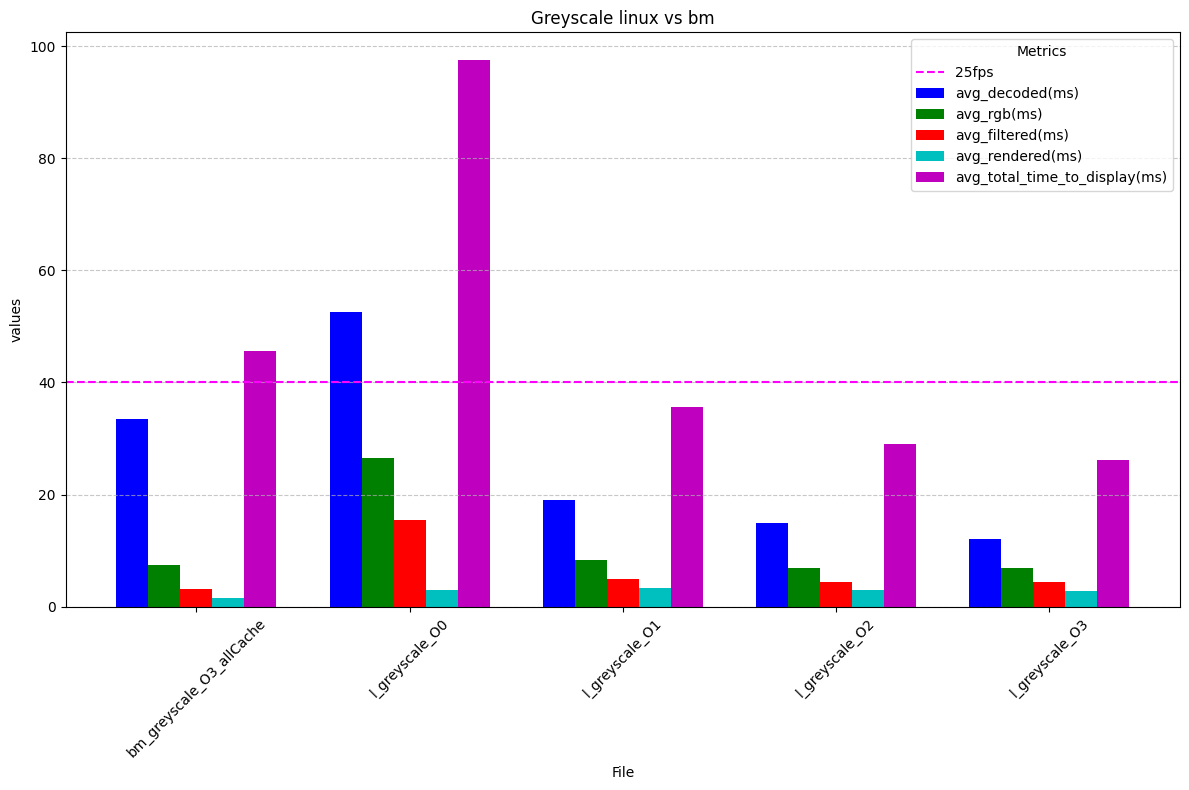

In [30]:
greyscale_graphs = pd.concat([
    avg_df[avg_df.index == 'bm_greyscale_O3_allCache'],
    avg_df[avg_df.index.str.contains('l_greyscale')]
])

x = np.arange(len(greyscale_graphs.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(greyscale_graphs.columns):
    plt.bar(x + i * bar_width, greyscale_graphs[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(greyscale_graphs.columns) - 1) * bar_width / 2, greyscale_graphs.index, rotation=45)
plt.title('Greyscale linux vs bm')
plt.xlabel('File')
plt.ylabel('values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.legend(title="Metrics")
plt.tight_layout()

plt.show()

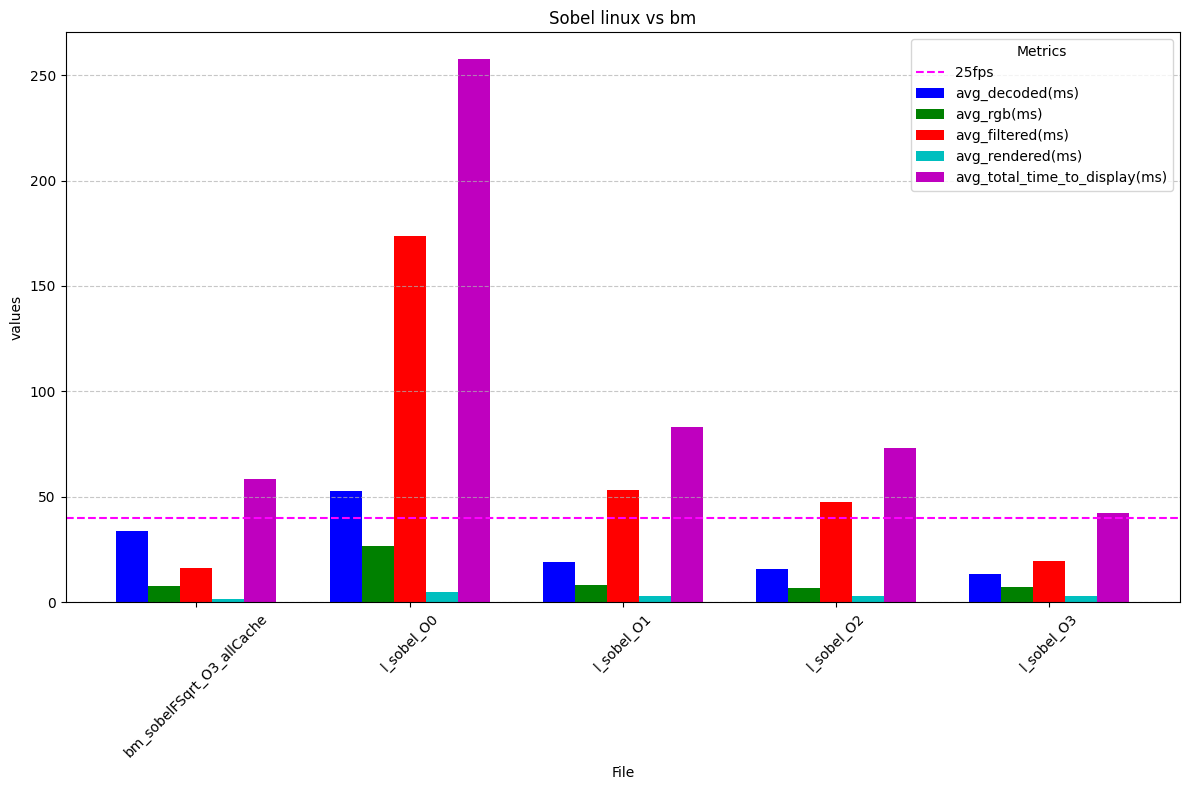

In [31]:
sobel_graphs = pd.concat([
    avg_df[avg_df.index == 'bm_sobelFSqrt_O3_allCache'],
    avg_df[avg_df.index.str.contains('l_sobel')]
])

x = np.arange(len(sobel_graphs.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(sobel_graphs.columns):
    plt.bar(x + i * bar_width, sobel_graphs[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(sobel_graphs.columns) - 1) * bar_width / 2, sobel_graphs.index, rotation=45)
plt.title('Sobel linux vs bm')
plt.xlabel('File')
plt.ylabel('values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.legend(title="Metrics")
plt.tight_layout()

plt.show()

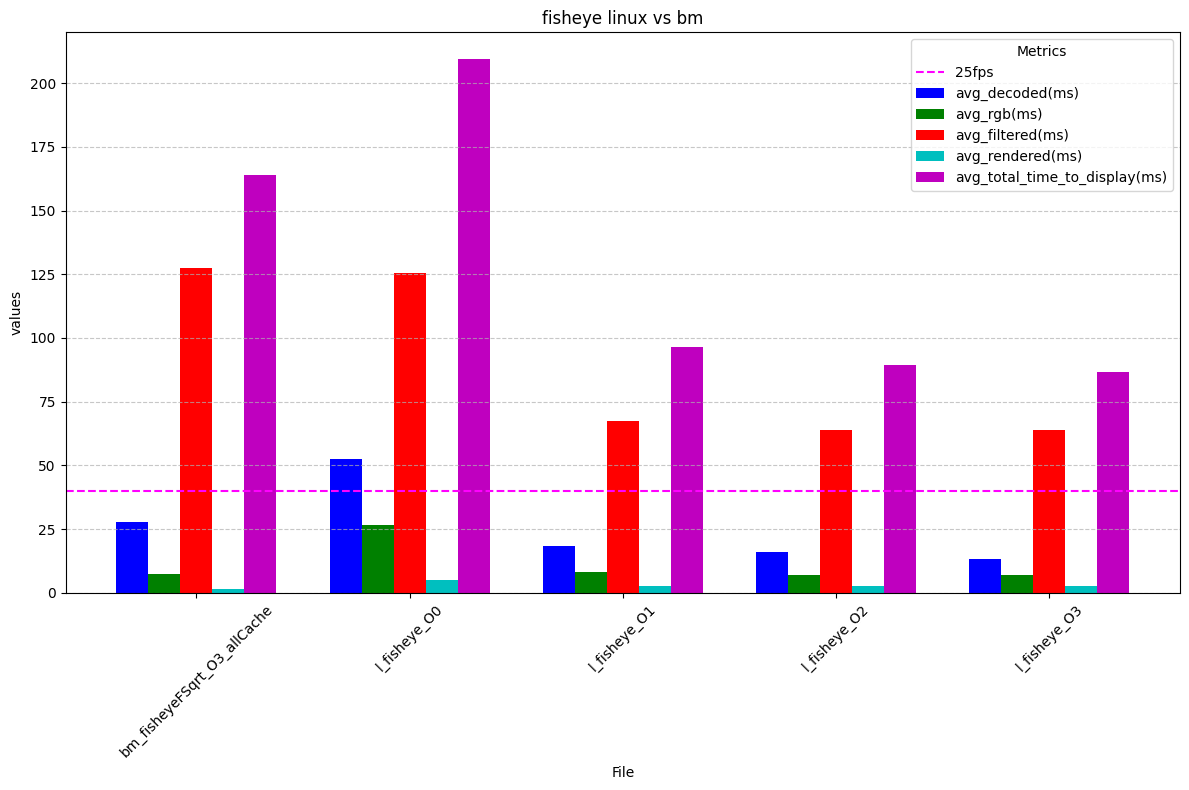

In [32]:
sobel_graphs = pd.concat([
    avg_df[avg_df.index == 'bm_fisheyeFSqrt_O3_allCache'],
    avg_df[avg_df.index.str.contains('l_fisheye')]
])

x = np.arange(len(sobel_graphs.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(sobel_graphs.columns):
    plt.bar(x + i * bar_width, sobel_graphs[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(sobel_graphs.columns) - 1) * bar_width / 2, sobel_graphs.index, rotation=45)
plt.title('fisheye linux vs bm')
plt.xlabel('File')
plt.ylabel('values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.legend(title="Metrics")
plt.tight_layout()

plt.show()

In [33]:
print("greyscale allCache bm vs linux")

print(f"decode fractional difference with bm: {((df_l[df_l.index == 'l_greyscale_O3']['avg_decoded(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_decoded(ms)'].iloc[0]) ) / (df_l[df_l.index == 'l_greyscale_O3']['avg_decoded(ms)'].iloc[0])}")
print(f"rgb conversion fractional difference with bm: {(df_l[df_l.index == 'l_greyscale_O3']['avg_rgb(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_rgb(ms)'].iloc[0]) / df_l[df_l.index == 'l_greyscale_O3']['avg_rgb(ms)'].iloc[0]}")
print(f"filter fractional difference with bm: {(df_l[df_l.index == 'l_greyscale_O3']['avg_filtered(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_filtered(ms)'].iloc[0]) / df_l[df_l.index == 'l_greyscale_O3']['avg_filtered(ms)'].iloc[0]}")
print(f"render fractional difference with bm: {(df_l[df_l.index == 'l_greyscale_O3']['avg_rendered(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_rendered(ms)'].iloc[0]) / df_l[df_l.index == 'l_greyscale_O3']['avg_rendered(ms)'].iloc[0]}")
print(f"overall fractional difference with bm: {(df_l[df_l.index == 'l_greyscale_O3']['avg_total_time_to_display(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_greyscale_O3_allCache']['avg_total_time_to_display(ms)'].iloc[0]) / df_l[df_l.index == 'l_greyscale_O3']['avg_total_time_to_display(ms)'].iloc[0]}")

greyscale allCache bm vs linux
decode fractional difference with bm: -1.7734081286924295
rgb conversion fractional difference with bm: -0.07965497849777965
filter fractional difference with bm: 0.2861888773428639
render fractional difference with bm: 0.4636792763959466
overall fractional difference with bm: -0.7398546722656028


In [34]:
print("sobel allCache bm vs linux")

print(f"decode fractional difference with bm: {((df_l[df_l.index == 'l_sobel_O3']['avg_decoded(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_sobelFSqrt_O3_allCache']['avg_decoded(ms)'].iloc[0]) ) / (df_l[df_l.index == 'l_sobel_O3']['avg_decoded(ms)'].iloc[0])}")
print(f"rgb conversion fractional difference with bm: {(df_l[df_l.index == 'l_sobel_O3']['avg_rgb(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_sobelFSqrt_O3_allCache']['avg_rgb(ms)'].iloc[0]) / df_l[df_l.index == 'l_sobel_O3']['avg_rgb(ms)'].iloc[0]}")
print(f"filter fractional difference with bm: {(df_l[df_l.index == 'l_sobel_O3']['avg_filtered(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_sobelFSqrt_O3_allCache']['avg_filtered(ms)'].iloc[0]) / df_l[df_l.index == 'l_sobel_O3']['avg_filtered(ms)'].iloc[0]}")
print(f"render fractional difference with bm: {(df_l[df_l.index == 'l_sobel_O3']['avg_rendered(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_sobelFSqrt_O3_allCache']['avg_rendered(ms)'].iloc[0]) / df_l[df_l.index == 'l_sobel_O3']['avg_rendered(ms)'].iloc[0]}")
print(f"overall fractional difference with bm: {(df_l[df_l.index == 'l_sobel_O3']['avg_total_time_to_display(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_sobelFSqrt_O3_allCache']['avg_total_time_to_display(ms)'].iloc[0]) / df_l[df_l.index == 'l_sobel_O3']['avg_total_time_to_display(ms)'].iloc[0]}")

sobel allCache bm vs linux
decode fractional difference with bm: -1.5547819756466348
rgb conversion fractional difference with bm: -0.06329790267017045
filter fractional difference with bm: 0.1743167783715839
render fractional difference with bm: 0.5186461752695232
overall fractional difference with bm: -0.38037101416964836


In [35]:
print("fisheye allCache bm vs linux")

print(f"decode fractional difference with bm: {((df_l[df_l.index == 'l_fisheye_O3']['avg_decoded(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_fisheyeFSqrt_O3_allCache']['avg_decoded(ms)'].iloc[0]) ) / (df_l[df_l.index == 'l_fisheye_O3']['avg_decoded(ms)'].iloc[0])}")
print(f"rgb conversion fractional difference with bm: {(df_l[df_l.index == 'l_fisheye_O3']['avg_rgb(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_fisheyeFSqrt_O3_allCache']['avg_rgb(ms)'].iloc[0]) / df_l[df_l.index == 'l_fisheye_O3']['avg_rgb(ms)'].iloc[0]}")
print(f"filter fractional difference with bm: {(df_l[df_l.index == 'l_fisheye_O3']['avg_filtered(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_fisheyeFSqrt_O3_allCache']['avg_filtered(ms)'].iloc[0]) / df_l[df_l.index == 'l_fisheye_O3']['avg_filtered(ms)'].iloc[0]}")
print(f"render fractional difference with bm: {(df_l[df_l.index == 'l_fisheye_O3']['avg_rendered(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_fisheyeFSqrt_O3_allCache']['avg_rendered(ms)'].iloc[0]) / df_l[df_l.index == 'l_fisheye_O3']['avg_rendered(ms)'].iloc[0]}")
print(f"overall fractional difference with bm: {(df_l[df_l.index == 'l_fisheye_O3']['avg_total_time_to_display(ms)'].iloc[0] - df_bm[df_bm.index == 'bm_fisheyeFSqrt_O3_allCache']['avg_total_time_to_display(ms)'].iloc[0]) / df_l[df_l.index == 'l_fisheye_O3']['avg_total_time_to_display(ms)'].iloc[0]}")

fisheye allCache bm vs linux
decode fractional difference with bm: -1.0725137436708292
rgb conversion fractional difference with bm: -0.07735697935971549
filter fractional difference with bm: -0.9977779664048799
render fractional difference with bm: 0.4663357628484021
overall fractional difference with bm: -0.8891178532831973


# bare metal internal comparisons

### bare metal sobel performances comparison of optimization and caching

In [36]:
sobel_stats = avg_df[avg_df.index.str.startswith('bm_sobel')]

sobel_stats = sobel_stats.sort_values(by='avg_total_time_to_display(ms)', ascending=True)
sobel_table = pd.DataFrame(index=sobel_stats.index)

for col in sobel_stats.columns:
  sobel_table[col] = sobel_stats[col]
sobel_table = sobel_table.infer_objects(copy=False)
sobel_table['% Gap to abv'] = sobel_table['avg_total_time_to_display(ms)'].pct_change() * 100
sobel_table

avg_decoded(ms)  avg_rgb(ms)  avg_filtered(ms)  \
file                                                                        
bm_sobelFSqrt_O3_allCache        33.618773     7.391852         16.163031   
bm_sobel_O3_allCache             34.633483     7.391469        193.828727   
bm_sobel_O3_cached              160.073722    88.898321        169.510750   
bm_sobel_O2_allCache             44.183813     7.393776       1038.729469   
bm_sobel_O1_allCache            180.459733     8.304943       1519.814804   
bm_sobel_O3_nocache             584.866108   230.793208       1005.512925   

                           avg_rendered(ms)  avg_total_time_to_display(ms)  \
file                                                                         
bm_sobelFSqrt_O3_allCache          1.280634                      58.454290   
bm_sobel_O3_allCache               1.515597                     237.369276   
bm_sobel_O3_cached                 4.699068                     423.181861   
bm_sobel_O2_allCache               2.559420                    1092.866477   
bm_sobel_O1_allCache               2.509898                    1711.089378   
bm_sobel_O3_nocache                8.266275                    1829.438517   

                           % Gap to abv  
file                                     
bm_sobelFSqrt_O3_allCache           NaN  
bm_sobel_O3_allCache         306.076742  
bm_sobel_O3_cached            78.279965  
bm_sobel_O2_allCache         158.249840  
bm_sobel_O1_allCache          56.568933  
bm_sobel_O3_nocache            6.916596

### bare metal greyscale performances comparison of optimization and caching

In [37]:
greyscale_stats = avg_df[avg_df.index.str.startswith('bm_greyscale')]

greyscale_stats = greyscale_stats.sort_values(by='avg_total_time_to_display(ms)', ascending=True)
greyscale_table = pd.DataFrame(index=greyscale_stats.index)

for col in greyscale_stats.columns:
  greyscale_table[col] = greyscale_stats[col]
greyscale_table = greyscale_table.infer_objects(copy=False)
greyscale_table['% Gap to abv'] = greyscale_table['avg_total_time_to_display(ms)'].pct_change() * 100
greyscale_table

avg_decoded(ms)  avg_rgb(ms)  avg_filtered(ms)  \
file                                                                       
bm_greyscale_O3_allCache        33.552006     7.391307          3.140352   
bm_greyscale_O2_allCache        37.919043     7.391929          3.740230   
bm_greyscale_O1_allCache       170.011213     8.307094          3.156094   
bm_greyscale_O3_cached         161.393784    89.894071         30.488165   
bm_greyscale_O3_nocache        578.684917   230.291261        144.010994   

                          avg_rendered(ms)  avg_total_time_to_display(ms)  \
file                                                                        
bm_greyscale_O3_allCache          1.546290                      45.629955   
bm_greyscale_O2_allCache          2.577017                      51.628219   
bm_greyscale_O1_allCache          2.522932                     183.997332   
bm_greyscale_O3_cached            4.634688                     286.410707   
bm_greyscale_O3_nocache           8.246708                     961.233881   

                          % Gap to abv  
file                                    
bm_greyscale_O3_allCache           NaN  
bm_greyscale_O2_allCache     13.145453  
bm_greyscale_O1_allCache    256.389077  
bm_greyscale_O3_cached       55.660250  
bm_greyscale_O3_nocache     235.613808

## bare metal fisheye performances comparison of optimization and caching

In [38]:
fisheye_stats = avg_df[avg_df.index.str.startswith('bm_fisheye')]

fisheye_stats = fisheye_stats.sort_values(by='avg_total_time_to_display(ms)', ascending=True)
fisheye_table = pd.DataFrame(index=fisheye_stats.index)

for col in fisheye_stats.columns:
  fisheye_table[col] = fisheye_stats[col]
fisheye_table = fisheye_table.infer_objects(copy=False)
fisheye_table['% Gap to abv'] = fisheye_table['avg_total_time_to_display(ms)'].pct_change() * 100
fisheye_table

avg_decoded(ms)  avg_rgb(ms)  avg_filtered(ms)  \
file                                                                          
bm_fisheyeFSqrt_O3_allCache        27.594406     7.387290        127.521727   
bm_fisheye_O2_allCache             24.651091     7.378861        307.197724   
bm_fisheye_O3_allCache             28.656116     7.372560        306.410591   
bm_fisheye_O1_allCache            163.807719     8.309585        311.713165   
bm_fisheye_O3_cached              162.201287    95.082259        335.427227   

                             avg_rendered(ms)  avg_total_time_to_display(ms)  \
file                                                                           
bm_fisheyeFSqrt_O3_allCache          1.500710                     164.004134   
bm_fisheye_O2_allCache               1.995750                     341.223426   
bm_fisheye_O3_allCache               1.505239                     343.944506   
bm_fisheye_O1_allCache               1.860787                     485.691256   
bm_fisheye_O3_cached                 4.506500                     597.217273   

                             % Gap to abv  
file                                       
bm_fisheyeFSqrt_O3_allCache           NaN  
bm_fisheye_O2_allCache         108.057821  
bm_fisheye_O3_allCache           0.797448  
bm_fisheye_O1_allCache          41.212099  
bm_fisheye_O3_cached            22.962328

## Optimization flags in diffrent environments

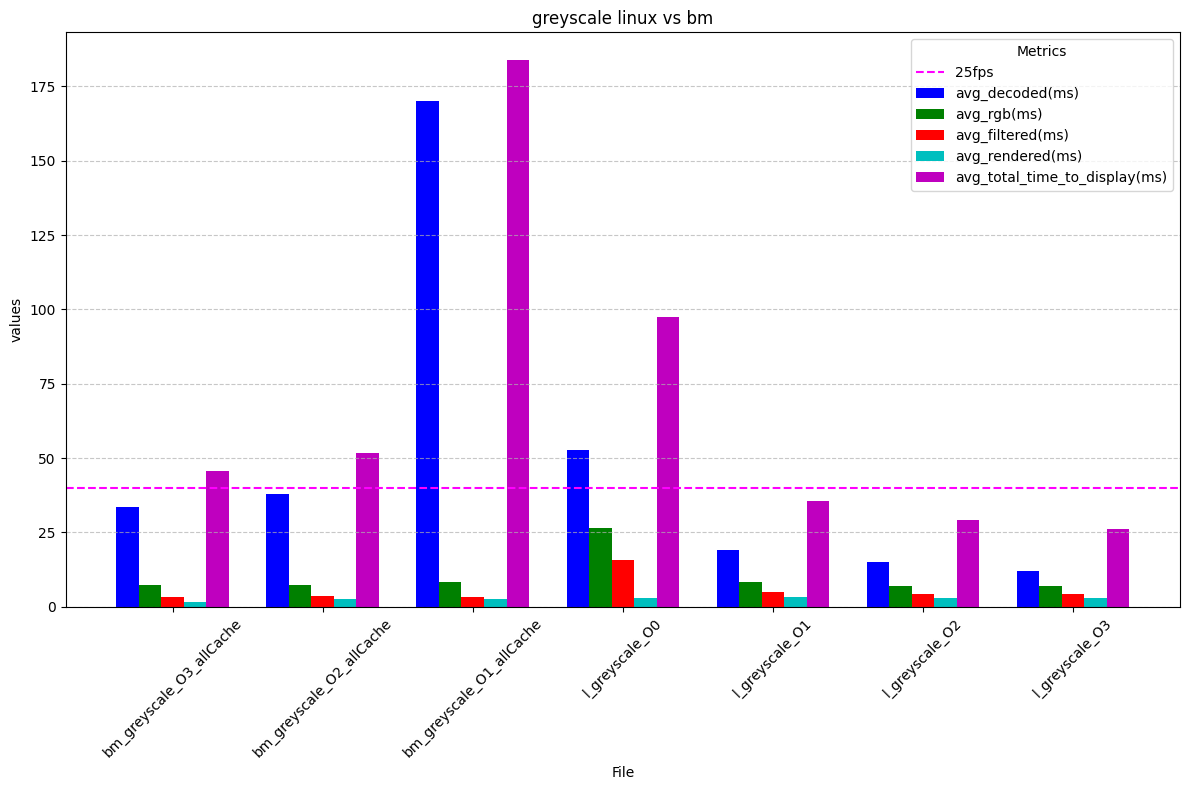

In [39]:
greyscale_graphs = pd.concat([
    avg_df[avg_df.index == 'bm_greyscale_O3_allCache'],
    avg_df[avg_df.index == 'bm_greyscale_O2_allCache'],
    avg_df[avg_df.index == 'bm_greyscale_O1_allCache'],
    avg_df[avg_df.index.str.contains('l_greyscale')]
])

x = np.arange(len(greyscale_graphs.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(greyscale_graphs.columns):
    plt.bar(x + i * bar_width, greyscale_graphs[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(greyscale_graphs.columns) - 1) * bar_width / 2, greyscale_graphs.index, rotation=45)
plt.title('greyscale linux vs bm')
plt.xlabel('File')
plt.ylabel('values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.legend(title="Metrics")
plt.tight_layout()

plt.show()

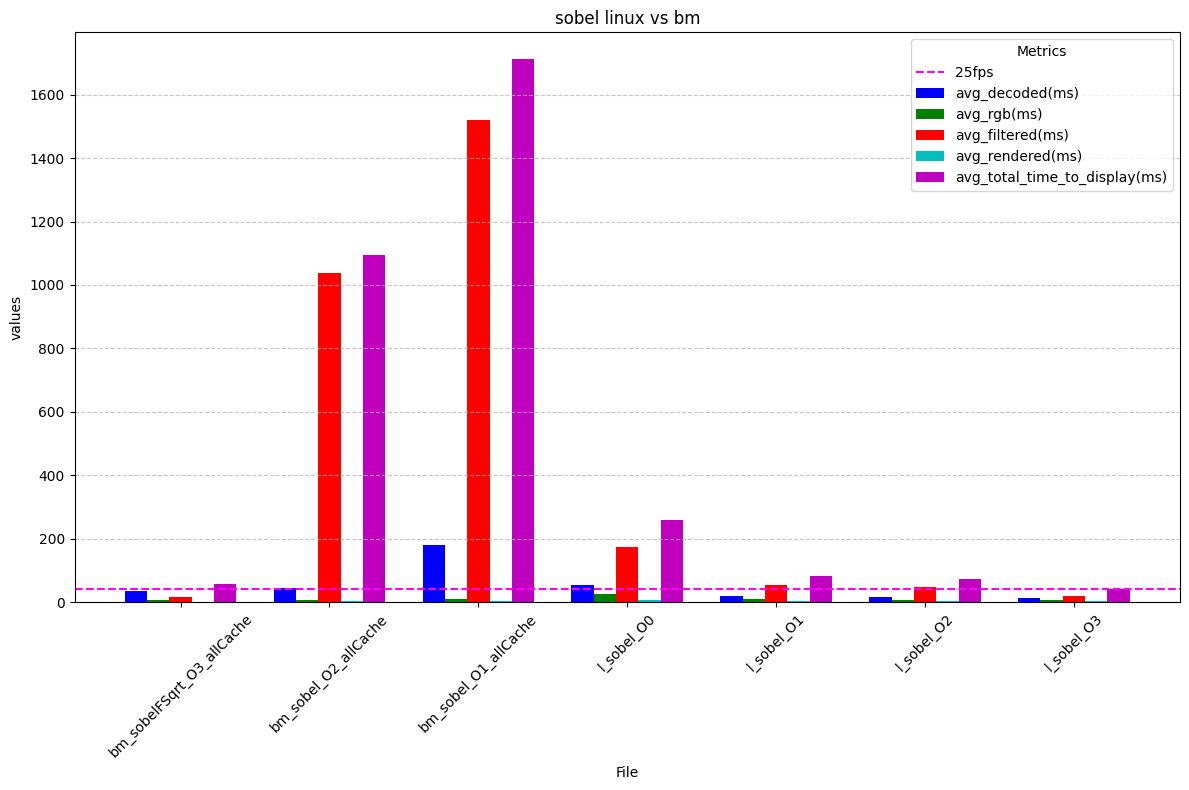

In [40]:
sobel_graphs = pd.concat([
    avg_df[avg_df.index == 'bm_sobelFSqrt_O3_allCache'],
    avg_df[avg_df.index == 'bm_sobel_O2_allCache'],
    avg_df[avg_df.index == 'bm_sobel_O1_allCache'],
    avg_df[avg_df.index.str.contains('l_sobel')]
])

x = np.arange(len(sobel_graphs.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(sobel_graphs.columns):
    plt.bar(x + i * bar_width, sobel_graphs[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(sobel_graphs.columns) - 1) * bar_width / 2, sobel_graphs.index, rotation=45)
plt.title('sobel linux vs bm')
plt.xlabel('File')
plt.ylabel('values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.legend(title="Metrics")
plt.tight_layout()

plt.show()

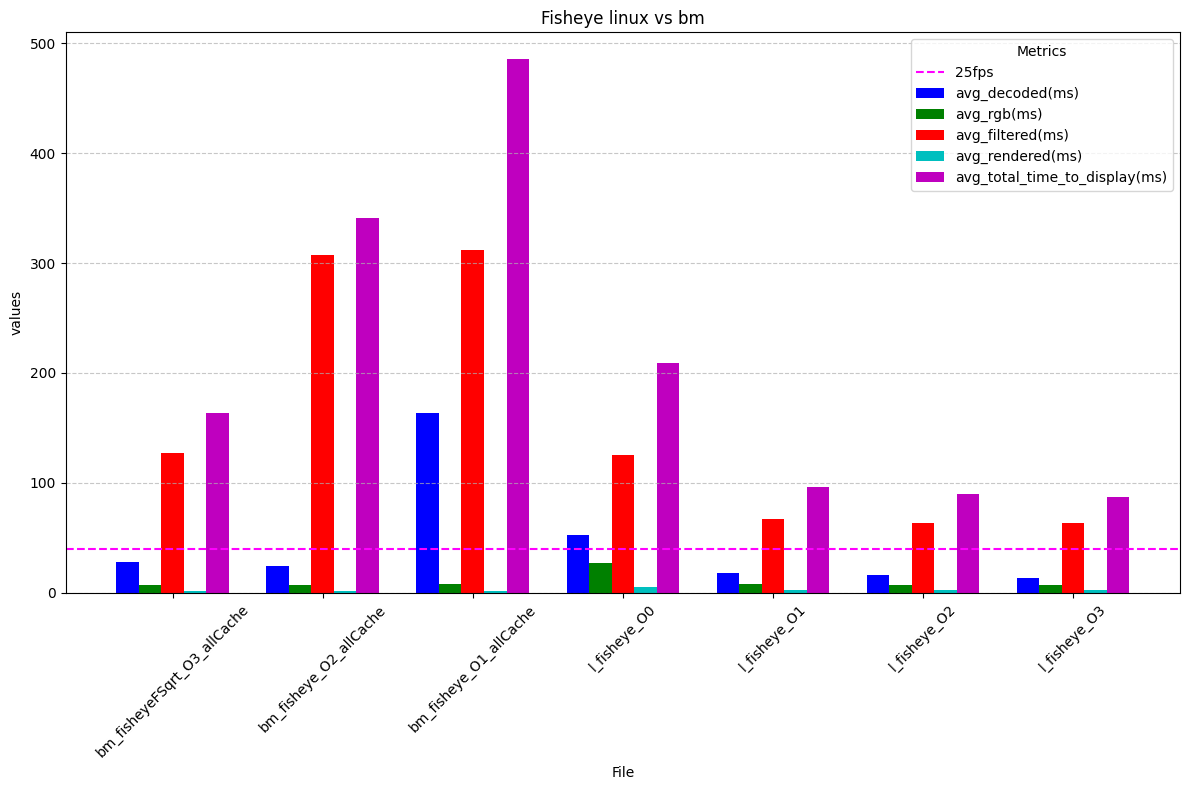

In [41]:
fisheye_graphs = pd.concat([
    avg_df[avg_df.index == 'bm_fisheyeFSqrt_O3_allCache'],
    avg_df[avg_df.index == 'bm_fisheye_O2_allCache'],
    avg_df[avg_df.index == 'bm_fisheye_O1_allCache'],
    avg_df[avg_df.index.str.contains('l_fisheye')]
])

x = np.arange(len(fisheye_graphs.index))
plt.figure(figsize=(12, 8))
for i, col in enumerate(fisheye_graphs.columns):
    plt.bar(x + i * bar_width, fisheye_graphs[col], width=bar_width, label=col, color=colours[i % len(colours)], align='center')

plt.xticks(x + (len(fisheye_graphs.columns) - 1) * bar_width / 2, fisheye_graphs.index, rotation=45)
plt.title('Fisheye linux vs bm')
plt.xlabel('File')
plt.ylabel('values')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=40, color='magenta', linestyle='--', label='25fps')
plt.legend(title="Metrics")
plt.tight_layout()

plt.show()

performance drift

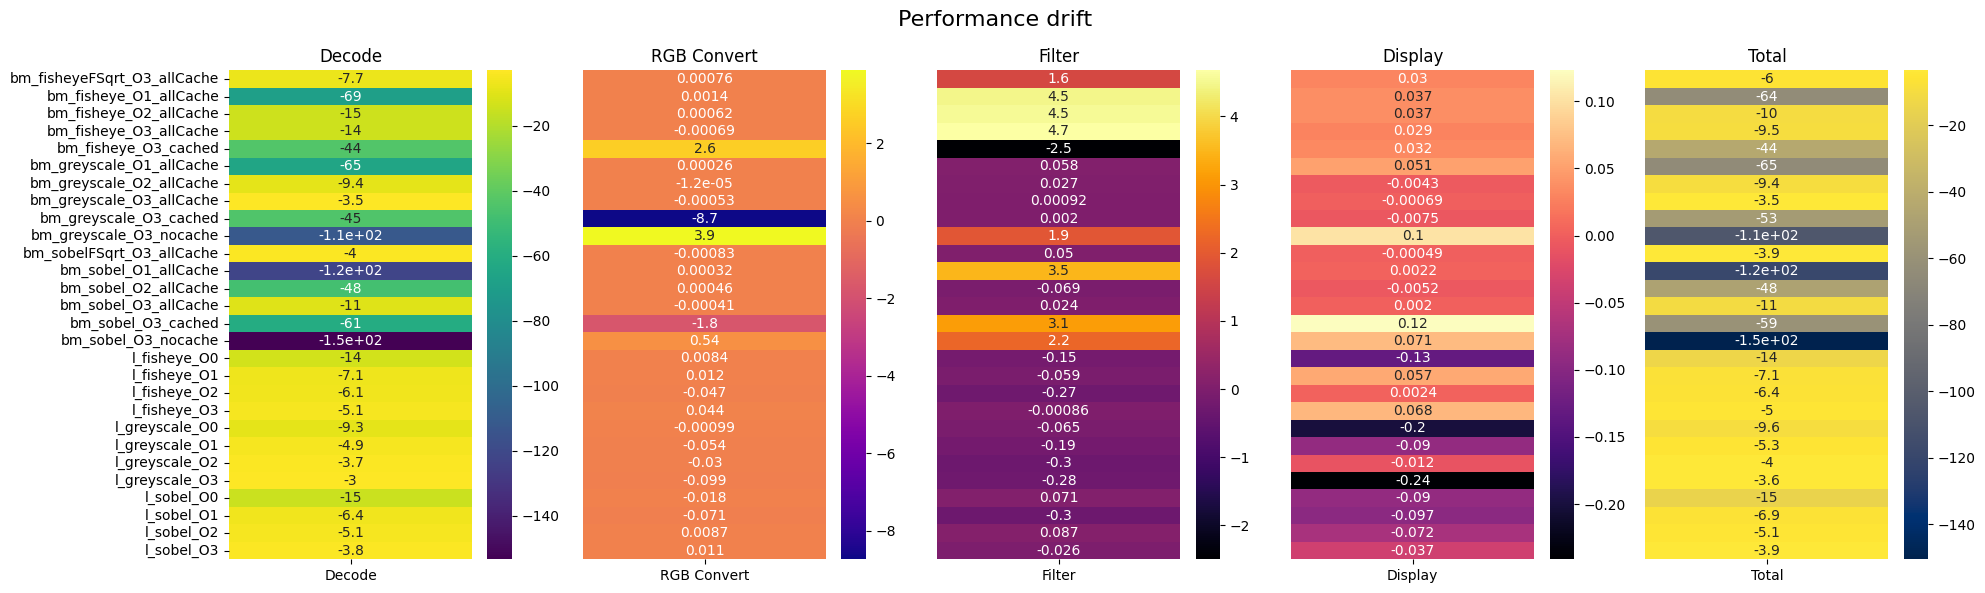

In [ ]:
def calculate_performance_drift(data):
    """Calculates performance drift as the difference between 
    the average of the first 10% and the last 10% of data."""
    n = int(len(data) * 0.15)
    start_section = data.iloc[3:3 + n]
    start_avg = start_section.mean()
    end_avg = data.tail(n).mean()
    drift = end_avg - start_avg  # Positive drift = slowdown, Negative drift = speedup
    return drift

jitter_df = pd.concat([dec_df.apply(calculate_performance_drift, axis=0),
                       rgb_df.apply(calculate_performance_drift, axis=0),
                       fil_df.apply(calculate_performance_drift, axis=0),
                       ren_df.apply(calculate_performance_drift, axis=0),
                       tot_df.apply(calculate_performance_drift, axis=0)], axis=1)
jitter_df.columns = ['Decode', 'RGB Convert', 'Filter', 'Display', 'Total']

yticklabels = jitter_df.index

fig, axes = plt.subplots(1, num_cols, figsize=(4 * num_cols, 6)) 
for i, col in enumerate(jitter_df.columns):
    sns.heatmap(jitter_df[[col]], annot=True, cmap=colormaps[i % len(colormaps)], ax=axes[i],
                yticklabels=(yticklabels if i == 0 else False))  

    axes[i].set_title(f'{col}') 
    axes[i].set_xlabel('') 


fig.suptitle('Performance drift', fontsize=16) 
plt.tight_layout()
plt.show()

In [43]:
print(jitter_df.to_string())

                                 Decode  RGB Convert    Filter   Display       Total
bm_fisheyeFSqrt_O3_allCache   -7.650535     0.000760  1.611512  0.030055   -6.008208
bm_fisheye_O1_allCache       -68.807951     0.001356  4.477312  0.036838  -64.292445
bm_fisheye_O2_allCache       -14.732386     0.000615  4.547049  0.036725  -10.147997
bm_fisheye_O3_allCache       -14.239916    -0.000693  4.675736  0.029061   -9.535812
bm_fisheye_O3_cached         -43.895563     2.605241 -2.495905  0.032208  -43.754019
bm_greyscale_O1_allCache     -64.703537     0.000258  0.057598  0.050593  -64.595088
bm_greyscale_O2_allCache      -9.411327    -0.000012  0.026620 -0.004255   -9.388974
bm_greyscale_O3_allCache      -3.490639    -0.000535  0.000921 -0.000687   -3.490940
bm_greyscale_O3_cached       -44.639074    -8.742584  0.001983 -0.007503  -53.387178
bm_greyscale_O3_nocache     -112.221519     3.875556  1.910963  0.103037 -106.331963
bm_sobelFSqrt_O3_allCache     -3.959618    -0.000828  0.049585 -0